# Chapter 7: Statistical Factor Models


- **Statistical Model Framework**
  - **Unknown Factors**: Neither **factor returns** nor **exposures** are known; both are estimated.
  - **Estimation Method**: Utilizes **Principal Component Analysis (PCA)**.
  - **Chamberlain (1983) Motivation**:
    - Assumes a finite number of factors, e.g., **$m$ factors**.
    - **Specific Risk** remains bounded across bounded portfolios.
    - **Eigenvalue Separation**: For a large number of assets, the **$m$ largest eigenvalues** separate clearly from the rest.
    - **PCA Convergence**: PCA approximates and converges to the true model asymptotically.

- **Advantages of Developing a Statistical Model**
  - **Complementarity**:
    - Enhances understanding by combining multiple models.
    - Allows **projection** of existing models onto the statistical model.
    - Enables **augmentation** with statistical factors.
  - **Optimization**:
    - Facilitates **portfolio optimization** by bounding total factor variance using different models.
    - Allows inclusion of both variances as constraints.
  - **Data Availability**:
    - Essential for asset classes lacking **firm characteristics** or **macroeconomic factors**.
    - **Statistical models** are the sole option when only **returns** data is available.
  - **Short Time Scales**:
    - Relevant for high-frequency intervals (e.g., **one- or five-minute**).
    - **Fundamental factors** may be less pertinent at these scales.
  - **Performance**:
    - **Statistical models** can potentially **outperform** alternative models.

- **Disadvantages of Statistical Models**
  - **Interpretability**:
    - **Loadings** are less interpretable compared to alternative estimation methods.
    - **First Factor**: Typically represents the **market**.
    - **Second and Third Factors**: Can sometimes be interpreted (e.g., **Litterman and Scheinkman [1991]**):
      - **Level** of the bond yield curve.
      - **Steepness** of the bond yield curve.
      - **Curvature** of the bond yield curve.
  - **Interpretation Challenges**:
    - **Johnson and Wichern (2007)**: Principal components serve as intermediate steps rather than standalone analyses.
    - More pronounced in **statistical models** due to poa **detour into real-world applications**.

## 1. Statistical Models: The Basics

**: Principal components are **orthogonal**, ensuring that each new component captures the maximum remaining variance **independent** of the previous components.y**: Principal components are **orthogonal**, ensuring that each new component captures the maximum remaining variance **independent** of the previous components.



### 1.1. Best Low-Rank Approximation and PCA

- **Matrix Definitions**
  - **Observed Returns Matrix**: $\mathbf{R} \in \mathbb{R}^{n \times T}$  
    - Each **column** represents returns in period $t$.
  - **Loadings Matrix**: $\mathbf{B} \in \mathbb{R}^{n \times m}$
  - **Factor Returns Matrix**: $\mathbf{F} \in \mathbb{R}^{m \times T}$

- **Optimization Problem**
  - **Objective**: Minimize total "unexplained" variation of returns across periods and assets.
  - **Formulation**:
    $$
    \begin{align*}
    & \min \|\mathbf{R} - \mathbf{B F}\|_{F}^{2}  \tag{7.1}\\
    & \text{ s.t. } \mathbf{B} \in \mathbb{R}^{n \times m}, \quad \mathbf{F} \in \mathbb{R}^{m \times T}
    \end{align*}
    $$
    - **$\|\cdot\|_{F}$**: **Frobenius Norm**
    - **Rank Constraint**: Matrix $\mathbf{B F}$ has **rank** $\leq m$.
    - **Equivalent Problem**:
      $$
      \begin{equation*}
      \min_{\operatorname{rank}(\hat{\mathbf{R}}) \leq m} \|\mathbf{R} - \hat{\mathbf{R}}\|^{2} \tag{7.2}
      \end{equation*}
      $$

- **Singular Value Decomposition (SVD)**
  - **Full SVD of $\mathbf{R}$**:
    $$
    \mathbf{R} = \mathbf{U S V}^{\top}
    $$
    - **$\mathbf{U}$**: Orthonormal matrix of size $n \times n$
    - **$\mathbf{V}$**: Orthonormal matrix of size $T \times T$
    - **$\mathbf{S}$**: Diagonal matrix of size $n \times T$ with **Singular Values** on the main diagonal.
  - **Solution to Problem (7.2)**:
    $$
    \hat{\mathbf{R}} = \mathbf{U S}_{m} \mathbf{V}^{\top}
    $$
    - **$\mathbf{S}_{m}$**: Diagonal matrix with the **top $m$ singular values**; remaining singular values set to zero.
    - **Compact Form**:
      $$
      \hat{\mathbf{R}} = \mathbf{U}_{m} \mathbf{S}_{m} \mathbf{V}_{m}^{\top}
      $$
      - **$\mathbf{U}_{m}$**: First $m$ columns of $\mathbf{U}$
      - **$\mathbf{V}_{m}$**: First $m$ columns of $\mathbf{V}$
  - **Estimated Loadings and Factor Returns**:
    $$
    \begin{align*}
    & \mathbf{B} = \mathbf{U}_{m}  \tag{7.3}\\
    & \mathbf{F} = \mathbf{S}_{m} \mathbf{V}_{m}^{\top} \tag{7.4}
    \end{align*}
    $$

- **Rotated Solutions**
  - **Rotational Invariance**: Solutions to the optimization problems are not unique; they can be rotated within the factor space using a non-singular matrix $\mathbf{C}$.
  - **General Form**: $\tilde{\mathbf{B}} = \mathbf{B C}, \quad \tilde{\mathbf{F}} = \mathbf{C}^{-1} \mathbf{F}$ for some non-singular $\mathbf{C} \in \mathbb{R}^{m \times m}$.
  - **Example Solution**:
    $$
    \begin{align*}
    & \mathbf{B} = \mathbf{U}_{m} \mathbf{S}_{m}  \tag{7.5}\\
    & \mathbf{F} = \mathbf{V}_{m}^{\top} \tag{7.6}
    \end{align*}
    $$

- **Principal Component Analysis (PCA)**
  - **Covariance Matrix**: $\hat{\boldsymbol{\Sigma}} \in \mathbb{R}^{n \times n}$
  - **Goal**: Generate a linear combination of original vectors $\mathbf{r}^{1}, \ldots, \mathbf{r}^{T}$ with maximum variance.
    - **Linear Combination**: $\mathbf{w}^{\top} \mathbf{r}^{1}, \ldots, \mathbf{w}^{\top} \mathbf{r}^{T}$
    - **Weights Vector**: $\mathbf{w} \in \mathbb{R}^{n}$, **normalized** ($\|\mathbf{w}\| = 1$)
    - **Variance**: $\mathbf{w}^{\top} \hat{\mathbf{\Sigma}} \mathbf{w}$
  - **Optimization Problem**:
    $$
    \begin{align*}
    & \max \mathbf{w}^{\top} \hat{\boldsymbol{\Sigma}} \mathbf{w}  \tag{7.7}\\
    & \text{ s.t. } \|\mathbf{w}\| \leq 1
    \end{align*}
    $$
    - **Interpretation**: Find a **maximum-variance portfolio** with the sum of squared net notional positions bounded by 1.
  - **Connection to Eigenvalues**:
    - **Lagrangian**:
      $$
      \nabla_{\mathbf{w}}\left(\mathbf{w}^{\top} \hat{\mathbf{\Sigma}} \mathbf{w}\right) + \lambda \nabla_{\mathbf{w}}\left(1 - \|\mathbf{w}\|^{2}\right) = 2 \hat{\boldsymbol{\Sigma}} \mathbf{w} - 2 \lambda \mathbf{w} = 0
      $$
    - **Eigenvalue Equation**: $\hat{\Sigma} \mathbf{v} = \lambda \mathbf{v}$
    - **Solution**: **Eigenvector** with the **highest eigenvalue** is the first principal component, $\mathbf{w}^{(1)}$.
  - **Finding Subsequent Principal Components**:
    - **Orthogonality Constraint**: Each new principal component is orthogonal to the previous ones.
    - **Example**:
      $$
      \begin{aligned}
      & \max \mathbf{w}^{\top} \hat{\boldsymbol{\Sigma}} \mathbf{w} \\
      & \text{ s.t. } \|\mathbf{w}\| \leq 1 \\
      & \quad \mathbf{w}^{\top} \mathbf{w}^{(1)} = 0
      \end{aligned}
      $$

- **Relationship Between PCA and SVD**
  - **Uncentered Covariance Matrix via SVD**:
    $$
    \hat{\boldsymbol{\Sigma}} = \frac{1}{T} \mathbf{R R}^{\boldsymbol{\top}} = \frac{1}{T} \mathbf{U S}^{2} \mathbf{U}^{\boldsymbol{\top}} \tag{7.9}
    $$
  - **Substitution into PCA Problem**:
    - Replace $\hat{\boldsymbol{\Sigma}}$ in Equation (7.7) with SVD decomposition.
    - **Simplification**: $\|\mathbf{U w}\| = \|\mathbf{w}\|$ due to **orthonormality** of $\mathbf{U}$.
    - **Resulting Optimization**: let $\mathbf{v} = \mathbf{U w}$ such that $\|\mathbf{w} \| = \|\mathbf{v} \|$
      $$
      \begin{array}{r}
      \max \mathbf{v}^{\top} \mathbf{S}^{2} \mathbf{v}  \tag{7.10}\\
      \text{ s.t. } \|\mathbf{v}\| = 1 \\            
      \end{array}
      $$
    - **Solution**: $\mathbf{v} = (1, 0, \ldots, 0)^{\top}$; hence, $\mathbf{w}$ is the **first column of $\mathbf{U}$**.
  - **Multiple Principal Components**:
    - **Columns of $\mathbf{U}_{m}$** solve for the first $m$ principal components.
    - **Non-uniqueness**: If eigenvalues are equal (e.g., $\lambda_{1} = \lambda_{2}$), any linear combination within the eigenspace is a valid solution.
    

- **Terminology and Variances**
  - **Principal Components**, **Eigenvectors**, and **Eigenfactors** are used interchangeably.
  - **Variances of Components**: Equal to the **squared singular values** from the SVD.

- **Extended Optimization for Multiple Eigenvectors**
  - **Objective**: Maximize the total variance captured by $m$ principal components.
  - **Formulation**:
    $$
    \begin{gather*}
    \max \operatorname{trace}\left(\mathbf{W}^{\top} \hat{\boldsymbol{\Sigma}} \mathbf{W}\right)  \tag{7.11}\\
    \text{ s.t. } \mathbf{W}^{\top} \mathbf{W} = \mathbf{I}_{m}, \\
    \quad \mathbf{W} \in \mathbb{R}^{n \times m}
    \end{gather*}
    $$


#### Key Concepts and Formulas

- **Frobenius Norm**:
  $$
  \|\mathbf{A}\|_{F} = \sqrt{\sum_{i,j} |a_{ij}|^{2}}
  $$

- **Unitarily Invariant Norm**: A matrix norm $\| \cdot \|$ is unitarily invariant if $\|\mathbf{A}\|_{F} = \| \mathbf{U S V}^{\top} \|$ for all matrices $\|\mathbf{A}\|$ and all orthogonal matrices $\mathbf{U}$ and $\mathbf{V}$. Examples include the Frobenius norm, spectral norm, and nuclear norm.

- **Singular Value Decomposition (SVD)**:
  $$
  \mathbf{R} = \mathbf{U S V}^{\top}
  $$
- **Principal Component Optimization**:
  $$
  \max \mathbf{w}^{\top} \hat{\boldsymbol{\Sigma}} \mathbf{w} \quad \text{ s.t. } \|\mathbf{w}\| \leq 1
  $$
- **Extended PCA for $m$ Components**:
  $$
  \max \operatorname{trace}\left(\mathbf{W}^{\top} \hat{\boldsymbol{\Sigma}} \mathbf{W}\right) \quad \text{ s.t. } \mathbf{W}^{\top} \mathbf{W} = \mathbf{I}_{m}
  $$





# 1. Statistical Models: The Basics

* **Principal Components**

  * **Orthogonal** by construction.
  * Each component captures the **maximum remaining variance**, **independent** of prior components.

---

## 1.1. Best Low-Rank Approximation and PCA

### Matrix Setup

* **Observed Returns**: \$\mathbf{R} \in \mathbb{R}^{n \times T}\$

  * Columns = returns at time \$t\$.
* **Loadings**: \$\mathbf{B} \in \mathbb{R}^{n \times m}\$
* **Factor Returns**: \$\mathbf{F} \in \mathbb{R}^{m \times T}\$

---

### Optimization Problem

* **Goal**: Approximate \$\mathbf{R}\$ with a rank-\$m\$ factor structure.
* **Formulation**:

  $$
  \min \|\mathbf{R} - \mathbf{B F}\|_{F}^{2} \tag{7.1}
  $$

  * $|\mathbf{A}|*{F} = \sqrt{\sum*{i,j} |a\_{ij}|^{2}}$ = **Frobenius norm**.
  * Frobenius is a **unitarily invariant norm** (invariant under orthogonal transformations).
* **Equivalent Form**:

  $$
  \min_{\operatorname{rank}(\hat{\mathbf{R}})\leq m} \|\mathbf{R} - \hat{\mathbf{R}}\|^{2} \tag{7.2}
  $$

---

### Singular Value Decomposition (SVD)

* **Full SVD**:

  $$
  \mathbf{R} = \mathbf{U S V}^{\top}
  $$

  * $\mathbf{U}$ (\$n \times n\$): orthonormal eigenvectors of \$\mathbf{R R}^{\top}\$.
  * $\mathbf{V}\$ (\$T \times T\$): orthonormal eigenvectors of \$\mathbf{R}^{\top}\mathbf{R}$.
  * $\mathbf{S}\$ (\$n \times T\$): diagonal with singular values \$\sigma\_{1}\geq \dots \geq 0$.

* **Best Rank-\$m\$ Approximation** (Eckart–Young theorem):

  $$
  \hat{\mathbf{R}} = \mathbf{U}_{m} \mathbf{S}_{m} \mathbf{V}_{m}^{\top}
  $$

  * \$\mathbf{U}*{m}\$, \$\mathbf{V}*{m}\$: first \$m\$ columns.
  * \$\mathbf{S}\_{m}\$: diagonal matrix with top \$m\$ singular values.

* **Factor Interpretation**:

  $$
  \mathbf{B} = \mathbf{U}_{m}, \quad \mathbf{F} = \mathbf{S}_{m}\mathbf{V}_{m}^{\top} \tag{7.3–7.4}
  $$

---

### Rotational Invariance

* Solutions not unique: can rotate factors with \$\mathbf{C} \in \mathbb{R}^{m \times m}\$ invertible:

  $$
  \tilde{\mathbf{B}} = \mathbf{B C}, \quad \tilde{\mathbf{F}} = \mathbf{C}^{-1}\mathbf{F}
  $$
* **PCA chooses a canonical rotation** (eigenvectors of covariance matrix).
* Example alternative:

  $$
  \mathbf{B} = \mathbf{U}_{m}\mathbf{S}_{m}, \quad \mathbf{F} = \mathbf{V}_{m}^{\top} \tag{7.5–7.6}
  $$

---

### PCA Formulation

* **Covariance Matrix**: \$\hat{\Sigma} = \tfrac{1}{T}\mathbf{R R}^{\top}\$.
* **Objective**: Find weights \$\mathbf{w}\$ with maximum variance:

  $$
  \max \mathbf{w}^{\top}\hat{\Sigma}\mathbf{w} \quad \text{s.t. } \|\mathbf{w}\|=1 \tag{7.7}
  $$

  * Interpretation: maximum-variance portfolio with unit notional exposure.
* **Lagrangian Condition**:

  $$
  \hat{\Sigma}\mathbf{w} = \lambda \mathbf{w}
  $$

  * First principal component = eigenvector of largest eigenvalue.
* **Subsequent Components**: enforce orthogonality:

  $$
  \mathbf{w}^{\top}\mathbf{w}^{(i)}=0, \quad i<k
  $$

---

### PCA and SVD Connection

* **Uncentered Covariance via SVD**:

  $$
  \hat{\Sigma} = \tfrac{1}{T}\mathbf{R R}^{\top} = \tfrac{1}{T}\mathbf{U S}^{2}\mathbf{U}^{\top} \tag{7.9}
  $$
* **Equivalence**: PCA eigenvectors = columns of \$\mathbf{U}\$.
* **Optimization**:

  $$
  \max \mathbf{v}^{\top}\mathbf{S}^{2}\mathbf{v} \quad \text{s.t. } \|\mathbf{v}\|=1 \tag{7.10}
  $$

  * Solution: \$\mathbf{v} = (1,0,\dots,0)^{\top}\$ → \$\mathbf{w}\$ = first column of \$\mathbf{U}\$.
* **Multiple Components**: \$\mathbf{U}\_{m}\$ = first \$m\$ principal components.
* **Non-uniqueness**: if eigenvalues equal, any orthogonal basis of eigenspace valid.

---

### Variances of Principal Components

* **Variance of \$i\$th component** = \$\sigma\_{i}^{2}\$ (squared singular value).
* **Explained Variance Ratio**:

  $$
  \text{EVR}_{i} = \frac{\sigma_{i}^{2}}{\sum_{j}\sigma_{j}^{2}}
  $$

---

### Extended Optimization for \$m\$ Components

* **Formulation**:

  $$
  \max_{\mathbf{W}^{\top}\mathbf{W}=I_{m}} \operatorname{trace}(\mathbf{W}^{\top}\hat{\Sigma}\mathbf{W}) \tag{7.11}
  $$
* **Interpretation**: Maximizes **total variance explained** = sum of top \$m\$ eigenvalues of \$\hat{\Sigma}\$.

---

## Key Takeaways

* **PCA = SVD of returns matrix** (up to scaling).
* **Frobenius norm minimization** → best low-rank approximation (Eckart–Young).
* **Rotational invariance**: factor models flexible; PCA provides unique orthogonal solution.
* **Variance explained**: linked directly to squared singular values.
* **Trace formulation**: captures aggregate explanatory power of top components.

---

Would you like me to also **add a figure reference** (like in your other chapters, with SVD or PCA geometry diagrams) to match the style of your text, or should we keep this purely algebraic?


al implications of **shrinkage techniques** and the inherent **biases** in **MLE estimates** of factor volatilities, highlighting the need for sophisticated **shrinkage strategies** in high-dimensional settings.
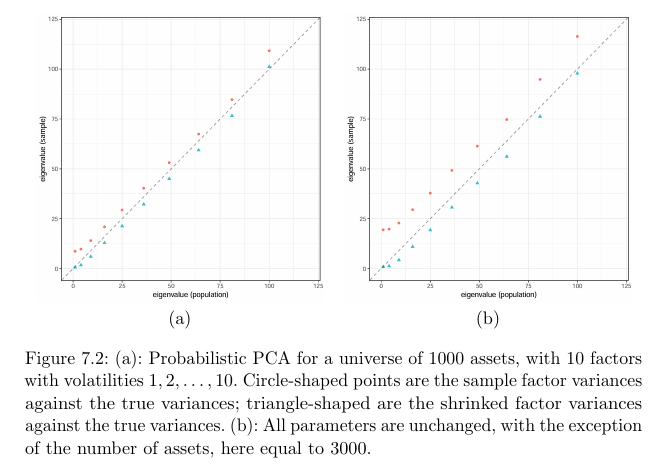

### 1.2: Maximum Likelihood Estimation and PCA

- **Factor Model Formulation**
  - **Standard Factor Model**:
    $$
    \mathbf{r} = \mathbf{B f} + \boldsymbol{\epsilon} \tag{7.12}
    $$
    - **$\mathbf{r}$**: Asset returns vector.
    - **$\mathbf{B}$**: **Loadings Matrix**.
    - **$\mathbf{f}$**: **Factor Returns Vector**.
    - **$\boldsymbol{\epsilon}$**: **Idiosyncratic Errors**.
  - **Issue with PCA Approximation**:
    - Approximating covariance with top $m$ eigenvalues yields a **singular covariance matrix**, which is **undesirable**.

- **Connecting Spectral Methods to Factor Models**
  - **Assumptions for Simplification**:
    - **Equal Idiosyncratic Volatilities**: $\sigma_{1}, \ldots, \sigma_{n} = \sigma$.
    - **Factor Covariance Matrix**: $\boldsymbol{\Sigma}_{\mathbf{f}} = \mathbf{I}_{m}$.
    - **Resulting Return Covariance**:
      $$
      \boldsymbol{\Sigma}_{\mathbf{r}} = \mathbf{B B}^{\top} + \sigma^{2} \mathbf{I}_{n}
      $$
      - **First $m$ Eigenvalues**: Greater than $\sigma^{2}$.

- **Probability PCA (PPCA) [Bishop, 2006]**
  - **Model Assumptions**:
    - **Factor Returns**: $\mathbf{f} \sim N(0, \mathbf{I}_{m})$.
    - **Idiosyncratic Errors**: $\boldsymbol{\epsilon} \sim N(0, \sigma^{2} \mathbf{I}_{n})$.
  - **Empirical Covariance Matrix**: $\boldsymbol{\Sigma}_{\mathbf{r}} = \frac{1}{T} \mathbf{R R}^{\top}$.
  - **Log-Likelihood Function**:
    $$
    \mathcal{L}\left(\hat{\boldsymbol{\Sigma}}_{\mathbf{r}}\right) = -\frac{T}{2} \left[ \log \left| \hat{\boldsymbol{\Sigma}}_{\mathbf{r}} \right| + \left\langle \hat{\boldsymbol{\Sigma}}_{\mathbf{r}}^{-1}, \boldsymbol{\Sigma}_{\mathbf{r}} \right\rangle + n \log (2\pi) \right] \tag{7.13}
    $$
    - **Scalar Product**: $\langle \mathbf{A}, \mathbf{B} \rangle := \operatorname{trace}(\mathbf{A}^{\top} \mathbf{B})$.
  - **Maximum Likelihood Estimation (MLE) Problem**:
    $$
    \begin{gather*}
    \max \left( -\log \left| \hat{\boldsymbol{\Sigma}}_{\mathbf{r}} \right| - \left\langle \hat{\boldsymbol{\Sigma}}_{\mathbf{r}}^{-1}, \boldsymbol{\Sigma}_{\mathbf{r}} \right\rangle \right) \tag{7.14} \\
    \text{ s.t. } \hat{\boldsymbol{\Sigma}}_{\mathbf{r}} = \hat{\mathbf{B}} \hat{\mathbf{B}}^{\top} + \hat{\sigma}^{2} \mathbf{I}_{n} \tag{7.15}
    \end{gather*}
    $$

- **Solution to MLE Problem [Tipping and Bishop, 1999]**
  - **SVD of Covariance Matrix**:
    $$
    \boldsymbol{\Sigma}_{\mathbf{r}} = \mathbf{U S U}^{\top}
    $$
  - **Estimated Parameters**:
    $$
    \begin{align*}
    & \hat{\mathbf{B}} = \mathbf{U}_{m} \left( \mathbf{S}_{m}^{2} - \hat{\sigma}^{2} \mathbf{I}_{n} \right)^{1/2} \tag{7.16} \\
    & \hat{\sigma}^{2} = \bar{\lambda} \tag{}
    \end{align*}
    $$
    - **$\bar{\lambda}$**: **Average** of the **last $n-m$ eigenvalues** of $\boldsymbol{\Sigma}_{\mathbf{r}}$.
  - **Alternative Model Rotation**:
    $$
    \begin{align*}
    & \mathbf{B} = \mathbf{U}_{m} \tag{7.17} \\
    & \boldsymbol{\Sigma}_{\mathbf{f}} = \mathbf{S}_{m}^{2} - \bar{\lambda} \mathbf{I}_{n} \tag{7.18} \\
    & \boldsymbol{\Sigma}_{\boldsymbol{\epsilon}} = \bar{\lambda} \mathbf{I}_{n} \tag{7.19}
    \end{align*}
    $$
  
- **Insights from the Model**
  - **Linkage**:
    - Connects **probabilistic factor models** to **PCA** of the empirical covariance matrix.
  - **Factor Covariance**:
    - **Diagonal** with **shrinked empirical variances** from PCA.
  - **Asymptotic Connection to PCA**:
    - **Limit**: $\hat{\sigma} \downarrow 0$ (idiosyncratic risks negligible).
    - **Simplified Formulas**:
      $$
      \begin{align*}
      & \mathbf{B} = \mathbf{U}_{m} \tag{7.20} \\
      & \boldsymbol{\Sigma}_{\mathbf{f}} = \mathbf{S}_{m}^{2} \tag{7.21} \\
      & \boldsymbol{\Sigma}_{\boldsymbol{\epsilon}} = 0 \tag{7.22}
      \end{align*}
      $$
    - **Result**: Reduces to the **PCA solution**.

- **Simulation Study**
  - **Parameters**:
    - **Idiosyncratic Volatility**: $\sigma = 1$.
    - **Time Periods**: $T = 250$.
    - **Number of Assets**: $n = 1000$ and $n = 3000$.
    - **Number of Factors**: $m = 10$.
    - **Factor Volatilities**: $1, 2, \ldots, 10$.
    - **Simulations**: 50 runs per parameter set.
  - **Figure 7.2 Description**:
    
    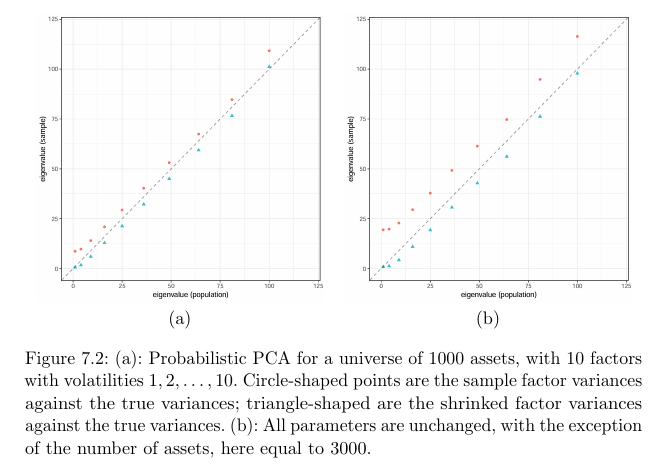
    - **(a)**: **1000 Assets**
      - **X-axis**: **True (Population) Factor Variances**.
      - **Y-axis**: 
        - **Sample Factor Variances** (circle-shaped points).
        - **Shrinked Factor Variances** (triangle-shaped points).
    - **(b)**: **3000 Assets**
      - **Same as (a)** but with $n = 3000$.
  - **Observations**:
    - **Upward Bias**: Higher ratio of assets to periods increases the **upward bias** of **sample eigenvalues** (sample factor variances).
    - **Shrinkage Effect**:
      - **Eliminates Upward Bias**.
      - Introduces **Downward Bias** which is **non-constant**.
      - **Implication**: **Optimal shrinkage** should not be a **constant offset**.
  - **Takeaways**:
    - **Sample Factor Eigenvalues** > **Population Eigenvalues**.
    - **Shrinkage** is beneficial but requires more nuanced approaches.
    - **MLE Estimates** may exhibit **bias** in factor volatilities.





### 1.3: Cross-Sectional and Time-Series Regressions via SVD

**Given factor loadings to estiamte factor returns**

- **PCA-Based Factor Estimation**
  - **Approach**:
    - Use the **first $m$ principal components** from PCA as **factor loadings**.
    - **Set** $\mathbf{B} = \mathbf{U}_{m}$, where $\mathbf{U}_{m}$ contains the **first $m$ columns** of $\mathbf{U}$ from the SVD.
  
- **Factor Returns Estimation via Cross-Sectional Regression**
  - **Model Representation**:
    $$
    \mathbf{R} = \mathbf{U}_{m} \hat{\mathbf{F}} + \mathbf{E} \tag{7.23}
    $$
    - **$\mathbf{R}$**: **Observed Returns Matrix** ($n \times T$).
    - **$\mathbf{U}_{m}$**: **Loadings Matrix** ($n \times m$) from PCA.
    - **$\hat{\mathbf{F}}$**: **Estimated Factor Returns Matrix** ($m \times T$).
    - **$\mathbf{E}$**: **Error Matrix**.
  
  - **Least-Squares Estimation**:
    $$
    \hat{\mathbf{F}} = \left(\mathbf{U}_{m}^{\top} \mathbf{U}_{m}\right)^{-1} \mathbf{U}_{m}^{\top} \mathbf{R} \tag{7.24}
    $$
    - **Simplification**: Since $\mathbf{U}_{m}$ is **orthonormal** ($\mathbf{U}_{m}^{\top} \mathbf{U}_{m} = \mathbf{I}_{m}$),
      $$
      \hat{\mathbf{F}} = \mathbf{U}_{m}^{\top} \mathbf{R} \tag{7.25}
      $$
    - **Relation to SVD**:
      $$
      \hat{\mathbf{F}} = \mathbf{U}_{m}^{\top} \mathbf{U S } \mathbf{V}^{\top} = \mathbf{S}_{m} \mathbf{V}_{m}^{\top} \tag{7.25}
      $$
      - **$\mathbf{S}_{m}$**: **Top $m$ Singular Values**.
      - **$\mathbf{V}_{m}$**: **First $m$ Columns** of $\mathbf{V}$ from SVD.
    - **Conclusion**: **Factor Returns** estimated via cross-sectional regression **match** those from the **SVD** ($\mathbf{S}_{m} \mathbf{V}_{m}^{\top}$) in Equation (7.4).

**Given factor returns to estiamte factor loadings**
- **Recovery of Loadings via Time-Series Regression**
  - **Given**: Estimated factor returns $\hat{\mathbf{F}}$ from Equation (7.25).
  - **Estimate Loadings**:
    - Perform **time-series regression** of **asset returns** against **factor returns**.
    - **Result**:
      $$
      \hat{\mathbf{B}} =  \mathbf{R} \hat{\mathbf{F}^{\top}}  \left(\hat {\mathbf{F}}^{\top} \hat{\mathbf{F}}\right)^{-1}  = \mathbf{U}_{m}
      $$
    - **Interpretation**: **Loadings** are the **time-series betas** of asset returns to the factor returns.
  
**Unique Properties of SVD in Factor Models**
  - **Exclusive Factorization**:
    - **SVD** is the **only factorization** where:
      - **Loadings** are **time-series betas**.
      - **Factor Returns** are **cross-sectional betas**.
  - **Implications**:
    - **Computational Simplification**: Facilitates efficient estimation of factors and loadings.
    - **Applications**:
      - **Incomplete Return Data**: Assists in estimating factors for assets with missing returns.
      - **Performance Attribution**:
        - **Explains discrepancies** between **time-series** and **cross-sectional** attributions in **fundamental factor models**.
      - **Link Between Models**:
        - **Connects** **statistical** and **fundamental** factor models through shared estimation techniques.
  


## 2: Beyond the Basics

- **Understanding PCA Behavior in Finite Samples**
  - **Key Parameters**:
    - **Number of Assets ($n$)**
    - **Number of Factors ($m$)**
    - **Rolling Window Width ($T$)**:
      - **Purpose**: Ensures data homogeneity and sufficient observations for parameter estimation.
      - **Visualization**: Refer to **Figure 7.3**.
  
- **Figure 7.3**
  - **Description**: Illustrates the estimation of risk model parameters using data within a rolling window of width $T$.
  - ![](https://cdn.mathpix.com/cropped/2024_12_08_feaf5e86753e6d77065cg-232.jpg?height=178&width=1010&top_left_y=1727&top_left_x=525)

- **Spectral Gap Consideration**
  - **Spectral Gap**: Difference between the $m$ th and $(m+1)$ th eigenvalues.
    - **Interpretation**: Represents the separation between the smallest factor variance and the largest idiosyncratic variance.
  




### 2.1. The Spiked Covariance Model

- **Empirical Covariance Matrix Eigenvalues**
  - **Notation**: $\lambda_{T, i}$ for $i = 1, \ldots, n$.
  - **Definition**:
    $$
    \tilde{\boldsymbol{\Omega}}_{r} := T^{-1} \sum_{t=1}^{T} \mathbf{r}_{t} \mathbf{r}_{t}^{\top} \tag{7.26}
    $$
  - **Spiked Covariance Model Assumptions**:
    - **Number of Spikes**: $0 < m < n$.
    - **Eigenvalue Behavior as $T \rightarrow \infty$**:
      $$
      \lambda_{i} := \lim_{T \rightarrow \infty} \lambda_{T, i} = 
      \begin{cases}
        1 & \text{for all } i > m \\
        \geq C n & \text{for all } i \leq m
      \end{cases} \tag{7.27}
      $$
    - **Spectral Gap**: Exists between the top $m$ eigenvalues and the remaining eigenvalues.
  
- **Relation to Factor Models**
  - **Factor Model Covariance Structure**:
    $$
    \mathbf{B B}^{\top} + \mathbf{I}_{n} \tag{7.28}
    $$
    - **Assumptions**:
      - **Idiosyncratic Volatilities**: $\sigma = 1$.
      - **Factor Covariance Matrix**: $\boldsymbol{\Sigma}_{\mathbf{f}} = \mathbf{I}_{m}$.
  - **Eigenvalue Scaling Justification**:
    - **Eigenvalues of $\mathbf{B B}^{\top}$**:
      - **Same as $\mathbf{B}^{\top} \mathbf{B}$**:
        $$
        \mathbf{B B}^{\top} = \mathbf{U S}^{2} \mathbf{U}^{\top}, \quad \mathbf{B}^{\top} \mathbf{B} = \mathbf{V S}^{2} \mathbf{V}^{\top}
        $$
      - **Top $m$ Eigenvalues**: Scale linearly with $n$.
    - **Heuristic Argument**:
      - **Rows of $\mathbf{B}$**: $\mathbf{b}_{i} \sim P(\mathbb{R}^{m})$ (iid samples from distribution $D$).
      - **Matrix Decomposition**:
        $$
        \mathbf{B}^{\top} \mathbf{B} = \sum_{i=1}^{n} \mathbf{b}_{i}^{\top} \mathbf{b}_{i} = n \left( n^{-1} \sum_{i=1}^{n} \mathbf{b}_{i}^{\top} \mathbf{b}_{i} \right)
        $$
      - **Law of Large Numbers**: As $n \rightarrow \infty$, $n^{-1} \sum_{i=1}^{n} \mathbf{b}_{i}^{\top} \mathbf{b}_{i} \rightarrow E_{D}(\mathbf{b}^{\top} \mathbf{b})$.
      - **Eigenvalue Limitation**: $\lambda_{i} \approx n \mu_{i}$, where $\mu_{i}$ are eigenvalues of $E_{D}(\mathbf{b}^{\top} \mathbf{b})$.
      - **Conclusion**: Largest eigenvalues scale linearly with $n$, creating a clear **spiked covariance structure**.

- **Spectrum of the Covariance Matrix**
  - **Eigenvalues**:
    - **Factor Eigenvalues**: $\nu_{1} + 1, \ldots, \nu_{m} + 1$.
    - **Idiosyncratic Eigenvalues**: $1, \ldots, 1$.
  - **Factor-Mimicking Portfolios**:
    - **Definition**: $\mathbf{w}_{i} = \mathbf{B} (\mathbf{B}^{\top} \mathbf{B})^{-1} \mathbf{e}_{i}$.
    - **Risk Decomposition**:
      - **Factor Variance**:
        $$
        \mathbf{w}_{i}^{\top} (\mathbf{B B}^{\top}) \mathbf{w}_{i} = \mathbf{e}_{i}^{\top} \mathbf{e}_{i} = 1
        $$
      - **Idiosyncratic Variance**:
        $$
        \begin{aligned}
        \mathbf{w}_{i}^{\top} \mathbf{w}_{i} &= \mathbf{e}_{i}^{\top} (\mathbf{B}^{\top} \mathbf{B})^{-1} \mathbf{e}_{i} \\
        &= \mathbf{e}_{i}^{\top} \mathbf{V S}^{-2} \mathbf{V}^{\top} \mathbf{e}_{i} \\
        &\leq \nu_{m}^{-1} \|\mathbf{V}^{\top} \mathbf{e}_{i}\|^{2} \\
        &\leq \nu_{m}^{-1} \|\mathbf{V}^{\top}\|^{2} \|\mathbf{e}_{i}\|^{2} \\
        &\leq \frac{1}{C n}
        \end{aligned}
        $$
        - **Conclusion**: For large $n$, **idiosyncratic variance** approaches **zero**.
  
- **Implications of the Spiked Covariance Model**
  - **Factor-Mimicking Portfolios**:
    - **Approximation Quality**: High for large $n$ due to vanishing idiosyncratic variance.
    - **Diversification Effect**: Idiosyncratic risk "diverges away" as the number of assets increases.
  - **Eigenvalue Separation**:
    - **Factor Eigenvalues**: Significantly larger than idiosyncratic eigenvalues, ensuring distinct factor identification.
  


### 2.2: Spectral Limit Behavior of the Spiked Covariance Model

- **Asymptotic Limits for PCA**
  - **Traditional Asymptotics**:
    - **Scenario**: $T \rightarrow \infty$, $n$ **constant**.
    - **Result**: **Anderson (1963)** showed that **sample eigenvalues** and **eigenvectors** converge to their **population counterparts**.
    - **Reference**: See **Appendix 7.6.2** for details.
  - **Modern Asymptotics**:
    - **Scenario**: Both $T$ and $n$ **tend to infinity**.
    - **Ratio**: $\gamma := \frac{n}{T} \in [0, \infty)$.
    - **Relevance**: Reflects real-world applications where the **number of observations** is **comparable** to the **number of variables**.
    - **Statistical Literature**: Initiated by **Johnstone (2001)**; **Chamberlain and Rothschild (1983)** imposed similar conditions.

- **Spiked Covariance Model Assumptions**
  1. **Finite Moments**:
     - Elements of $\mathbf{r}_{t}$ have **finite fourth moments**.
  2. **Eigenvalue Conditions**:
     - **Existence of Constants**: $m$ constants $c_{i}$ with $0 < c_{1} < c_{2} < \ldots < c_{m}$.
     - **Asymptotic Behavior**:
       $$
       \frac{\gamma}{\lambda_{i}} \rightarrow c_{i}, \quad i = 1, \ldots, m \tag{7.29}
       $$
  3. **Remaining Eigenvalues**:
     - **Condition**: For $i > m$, $\lambda_{i} = 1$.

- **Spectral Limit Results [Shen et al., 2016; Johnstone and Paul, 2018]**
  1. **Spiked Eigenvalues ($\lambda_{i} > 1 + \sqrt{\gamma}$)**:
     - **Sample Eigenvalue Convergence**:
       $$
       \hat{\lambda}_{i} \rightarrow \mu_{i} := \lambda_{i} \left(1 + c_{i}\right) \quad \text{a.s.} \tag{7.30}
       $$
     - **Interpretation**:
       - In the **asymptotic setting** with **increasing $n$**, **diversifiable risk** diminishes.
       - **Factor-Mimicking Portfolios** have **vanishing idiosyncratic variance**.
  2. **Non-Spiked Eigenvalues ($\lambda_{i} \leq 1 + \sqrt{\gamma}$)**:
     - **Sample Eigenvalue Convergence**:
       $$
       \hat{\lambda}_{i} \rightarrow (1 + \sqrt{\gamma})^{2} \quad \text{in probability}
       $$
     - **Eigenvector Behavior**:
       $$
       \left|\left\langle \mathbf{u}_{i}, \hat{\mathbf{U}}_{i} \right\rangle \right| \rightarrow 
       \begin{cases}
         \frac{1}{\sqrt{1 + c_{i}}} & i \leq m \\
         O\left(\frac{1}{\sqrt{\gamma}}\right) & i > m
       \end{cases} \tag{7.32}
       $$
       - **Interpretation**:
         - For **spiked eigenvalues**, sample eigenvectors become **collinear** with population eigenvectors.
         - For **non-spiked eigenvalues**, sample eigenvectors contain **no information** about population eigenvectors.
  
- **BBP Theorem and Extensions**
  - **BBP Theorem**: **Baik, Ben Arous, and Péché (2005)** established the **phase transition** phenomenon in the **spiked covariance model**.
 

- **Heuristic Justification for Eigenvalue Scaling**
  - **Factor Model Covariance**:
    $$
    \mathbf{B B}^{\top} + \mathbf{I}_{n} \tag{7.28}
    $$
  - **SVD Decomposition of $\mathbf{B}$**:
    - $\mathbf{B} = \mathbf{U S V}^{\top}$
    - **Matrix Products**:
      $$
      \mathbf{B B}^{\top} = \mathbf{U S}^{2} \mathbf{U}^{\top}, \quad \mathbf{B}^{\top} \mathbf{B} = \mathbf{V S}^{2} \mathbf{V}^{\top}
      $$
    - **Eigenvalue Correspondence**: $\mathbf{B B}^{\top}$ and $\mathbf{B}^{\top} \mathbf{B}$ share the **same top $m$ eigenvalues**.
  - **Row Assumption for $\mathbf{B}$**:
    - **Rows**: $\mathbf{b}_{i} \sim P(\mathbb{R}^{m})$ (iid samples from distribution $D$).
    - **Matrix Sum**:
      $$
      \mathbf{B}^{\top} \mathbf{B} = \sum_{i=1}^{n} \mathbf{b}_{i}^{\top} \mathbf{b}_{i} = n \left( n^{-1} \sum_{i=1}^{n} \mathbf{b}_{i}^{\top} \mathbf{b}_{i} \right)
      $$
    - **Law of Large Numbers**: For large $n$, $n^{-1} \sum_{i=1}^{n} \mathbf{b}_{i}^{\top} \mathbf{b}_{i} \rightarrow E_{D}(\mathbf{b}^{\top} \mathbf{b})$.
    - **Eigenvalue Scaling**: Eigenvalues of $\mathbf{B}^{\top} \mathbf{B}$ approach $n \mu_{i}$, where $\mu_{i}$ are eigenvalues of $E_{D}(\mathbf{b}^{\top} \mathbf{b})$.
    - **Covariance Matrix Eigenvalues**: $\mathbf{B B}^{\top} + \mathbf{I}_{n}$ has eigenvalues $n \mu_{i} + 1$ for $i \leq m$ and $1$ for $i > m$.
    - **Conclusion**: **Spiked eigenvalues** scale **linearly with $n$**, ensuring a **spectral gap** from the **bulk** eigenvalues.

- **Factor-Mimicking Portfolios**
  - **Definition**:
    $$
    \mathbf{w}_{i} = \mathbf{B} \left( \mathbf{B}^{\top} \mathbf{B} \right)^{-1} \mathbf{e}_{i}
    $$
    - **$\mathbf{e}_{i}$**: **Unit Vector** with 1 in the $i$th position.
  - **Risk Decomposition**:
    1. **Factor Variance**:
       $$
       \mathbf{w}_{i}^{\top} \left( \mathbf{B B}^{\top} \right) \mathbf{w}_{i} = \mathbf{e}_{i}^{\top} \mathbf{e}_{i} = 1
       $$
    2. **Idiosyncratic Variance**:
       $$
       \begin{aligned}
       \mathbf{w}_{i}^{\top} \mathbf{w}_{i} &= \mathbf{e}_{i}^{\top} \left( \mathbf{B}^{\top} \mathbf{B} \right)^{-1} \mathbf{e}_{i} \\
       &= \mathbf{e}_{i}^{\top} \mathbf{V S}^{-2} \mathbf{V}^{\top} \mathbf{e}_{i} \\
       &\leq \nu_{m}^{-1} \left\| \mathbf{V}^{\top} \mathbf{e}_{i} \right\|^{2} \\
       &\leq \nu_{m}^{-1} \left\| \mathbf{V}^{\top} \right\|^{2} \left\| \mathbf{e}_{i} \right\|^{2} \\
       &\leq \frac{1}{C n}
       \end{aligned} \tag{}
       $$
       - **Conclusion**: For large $n$, **idiosyncratic variance** approaches **zero**.
  
- **Insights from the Spiked Covariance Model**
  - **Upward Bias of Spiked Eigenvalues**:
    - **Condition**: $\lambda_{i} > 1 + \sqrt{\gamma}$.
    - **Bias Magnitude**: Higher bias when $\lambda_{i}$ is closer to the **ground eigenvalues**.
    - **Reasoning**: Smaller separation increases the probability that the sample eigenvalue is influenced by noise.
  - **Critical Threshold ($1 + \sqrt{\gamma}$)**:
    - **Above Threshold**:
      - **Eigenvalue Separation**: Spiked eigenvalues **separate** from the bulk.
      - **Eigenvector Alignment**: Sample eigenvectors become **collinear** with population eigenvectors.
      - **Implication**: Larger $\lambda_{i}$ leads to better **eigenvector collinearity**.
    - **Below Threshold**:
      - **Eigenvalue Convergence**: Sample eigenvalues **cannot** be distinguished from the bulk.
      - **Eigenvector Information**: Sample eigenvectors contain **no information** about population eigenvectors.
  - **Practical Implications**:
    - **Asset and Observation Counts**:
        - For $n \in (10^{3}, 10^{4})$ and $T \in (250, 1,000)$, $\gamma \in (0.025, 40)$.
        - **Threshold Range**: $1 + \sqrt{\gamma} \in (2, 7)$.
    - **Application**: Guides **thresholding eigenvalues** and interpreting **eigenvector significance** based on the **spectral gap**.

- **Figure 7.4**
  - **Description**: Illustrates the **inflation of sample eigenvalues** as per **Equation (7.30)** for $\gamma = 0.2$.
  - ![](https://cdn.mathpix.com/cropped/2024_12_08_feaf5e86753e6d77065cg-238.jpg?height=792&width=800&top_left_y=447&top_left_x=611)
  - **Insight**: Demonstrates how **sample eigenvalues** are **upwardly biased** relative to their **population counterparts** in the presence of a **spiked covariance structure**.



### 2.3: Optimal Shrinkage of Eigenvalues

- **Eigenvalue Bias in PCA**
  - **Issue**: **Empirical eigenvalues** from PCA are **biased upward**.
    - **Impact**: Predicted **portfolio variance** in the subspace spanned by **spike eigenvectors** is **biased upward by $\gamma$**.
  - **Portfolio Construction Example**:
    - **Unit-Norm Vector**: Let $\mathbf{a} \in \mathbb{R}^{m}$ with $\|\mathbf{a}\| = 1$.
    - **Portfolio**: $\mathbf{w} = \mathbf{U}_{m} \mathbf{a}$.
    - **Estimated Variance**:
      $$
      \hat{\sigma}_{\mathbf{w}}^{2} = \mathbf{a}^{\top} \hat{\boldsymbol{\Lambda}} \mathbf{a} = \sum_{i=1}^{m} \hat{\lambda}_{i} a_{i}^{2} = \sum_{i=1}^{m} \lambda_{i} a_{i}^{2} + \gamma = \sigma_{\mathbf{w}}^{2} + \gamma
      $$
    - **Orthogonal Subspace**:
      - **Variance Estimate (by BBP theorem, details not shown)**:
        $$
        \hat{\sigma}_{\mathbf{w}}^{2} = \sigma_{\mathbf{w}}^{2} + 2 \sqrt{\gamma} + \gamma
        $$
  
- **Optimal Shrinkage of Eigenvalues**
  - **Objective**: Correct the **bias in empirical eigenvalues** by applying a **shrinkage function**.
  - **Shrinkage Function Example**:
    $$
    \ell(\lambda) = \lambda - \gamma, \quad \lambda \geq 1 + \sqrt{\gamma} \tag{7.33}
    $$
    - **Application**: Apply $\ell$ to each **diagonal entry** of the **singular values matrix** $\mathbf{S}$.
    - **Behavior**:
      - **Large $\lambda$**: **Less proportional shrinkage**.
      - **Small $\lambda$**: **More proportional shrinkage**.
  - **Optimal Shrinkage Considerations**:
    - **Loss Function Dependency**: The choice of **loss function** (e.g., **operator norm**, **precision matrix norm**) influences the **optimal shrinkage**.
    - **Optimal Shrinkage Formula**:
      $$
      \ell(\lambda) \simeq \lambda + 1 - \gamma
      $$
      - **Interpretation**: **Subtract** a **constant offset** from each **eigenvalue**.
      - **Proportionality**: **Large eigenvalues** are **shrunk less** than **small eigenvalues**.
  
- **Connection to Ledoit-Wolf Shrinkage**
  - **Ledoit-Wolf Method**:
    - **Formulation**:
      $$
      \hat{\boldsymbol{\Sigma}}_{r} = \rho_{1} \tilde{\boldsymbol{\Sigma}}_{r} + \rho_{2} \mathbf{I}_{n} \tag{7.34}
      $$
      - **Objective**: Minimize the **Frobenius norm** distance:
        $$
        \min \left\| \hat{\boldsymbol{\Sigma}}_{r} - \boldsymbol{\Sigma}_{r} \right\|_{F} \tag{7.35}
        $$
      - **Solution**:
        $$
        \hat{\boldsymbol{\Sigma}}_{r} = \left(1 - \frac{\kappa}{T}\right) \tilde{\boldsymbol{\Sigma}}_{r} + \frac{\kappa}{T} \mathbf{I}_{n} \tag{7.36}
        $$
    - **Interpretation**:
      - **Geometric**: Represents the **minimum distance** problem in a **Hilbert space**.
    - **Limitations**:
      - **Relevance**: Assumes **$n$ fixed**, **$T \rightarrow \infty$**, which is **inapplicable** when **$n > T$** or **$n \asymp T$**.
      - **Flexibility**: Restricts estimates to the **subspace spanned** by $\tilde{\boldsymbol{\Sigma}}_{r}$ and $\mathbf{I}_{n}$, which may be **overly restrictive**.
      - **Eigenvalue Adjustment**: The shrinkage does **not align** with the **optimal asymptotic shrinkage** for the **spiked covariance model**.
  - **Conclusion**: While **Ledoit-Wolf shrinkage** is popular, it is **not recommended** for **spiked covariance models** due to **structural mismatches** and **asymptotic irrelevance**.

- **Optimal Shrinkage for Spiked Covariance Models**
  - **Optimality Conditions**: Based on **Donoho et al. [2018]**, optimal shrinkage depends on the **loss function**.
    - **Operator Norm Loss**: $\|\mathbf{A} - \mathbf{B}\|$
    - **Precision Matrix Norm Loss**: $\|\mathbf{A}^{-1} - \mathbf{B}^{-1}\|$
  - **Optimal Shrinkage Formula**:
    $$
    \ell(\lambda) \simeq \lambda + 1 - \gamma \quad \text{for large } \lambda
    $$
    - **Behavior**:
      - **Large Eigenvalues**: **Less shrinkage** proportional to their magnitude.
      - **Small Eigenvalues**: **More shrinkage** to correct bias.
  - **Benefits**:
    - **Asymptotic Unbiasedness**: Corrects the **upward bias** in empirical eigenvalues.
    - **Enhanced Portfolio Variance Estimates**: Provides **more accurate** variance predictions by mitigating bias.

- **Practical Implications for Portfolio Managers**
  - **Thresholding Eigenvalues**:
    - **Critical Threshold**: $1 + \sqrt{\gamma}$.
    - **Application**: Identify **true factors** (eigenvalues above threshold) and **noise** (eigenvalues below threshold).
  - **Bias Correction**:
    - **Adjust Empirical Eigenvalues** using **optimal shrinkage functions** to obtain **unbiased estimates**.
    - **Improve Portfolio Construction**: Use **shrinked eigenvalues** for more accurate **risk assessment** and **portfolio optimization**.
  - **Limitations of Traditional Shrinkage Methods**:
    - **Inapplicability in High-Dimensional Settings**: Traditional methods like **Ledoit-Wolf** are not suited for **spiked covariance models** with **high $n$** and **finite $T$**.



### 2.4: Eigenvalues: Experiments Vs. Theory

- **Simulation Setup**
  - **Parameters**:
    - **Number of Factors ($m$)**: 10
    - **Factor Standard Deviations**: Uniformly spaced between **1** and **10**
    - **Idiosyncratic Standard Deviations ($\sigma$)**: 1
    - **Number of Periods ($T$)**: 250
    - **Number of Assets ($n$)**: 1000 and 3000
  - **Return Distributions**:
    - **Normal Returns**: Both **factor** and **idiosyncratic** returns are **normally distributed**
    - **Heavy-Tailed Returns**: Both **factor** and **idiosyncratic** returns follow a **t-distribution** with **5 degrees of freedom** (simulating returns with four finite moments)
  - **Simulation Runs**: 50 instances per factor model

- **Empirical Analysis**
  - **Empirical Eigenvalues**: Compute the **first ten empirical top eigenvalues** for each simulation
  - **Shrinkage Application**: Apply the shrinkage function $\ell(\hat{\lambda})$ as per **Equation (7.33)**:
    $$
    \ell(\lambda) = \lambda - \gamma, \quad \lambda \geq 1 + \sqrt{\gamma} \tag{7.33}
    $$

- **Simulation Results (Figure 7.5)**
  ![](https://cdn.mathpix.com/cropped/2024_12_08_feaf5e86753e6d77065cg-242.jpg?height=1134&width=1289&top_left_y=542&top_left_x=364)

  - **Findings**:
    - **Normal Returns**: The **shrinkage function** $\ell$ effectively corrects the **upward bias** in **empirical eigenvalues**
    - **Heavy-Tailed Returns**: The **shrinkage function** $\ell$ **fails to adequately correct** the bias
  - **Figure 7.5 Details**:
    - **Subfigures**:
      - **(a)**: 1000 assets, normally distributed returns
      - **(b)**: 1000 assets, t-distributed returns
      - **(c)**: 3000 assets, normally distributed returns
      - **(d)**: 3000 assets, t-distributed returns
    - **Axes**:
      - **X-axis**: **Population Eigenvalues**
      - **Y-axis**: **Shrinked Empirical Eigenvalues**
    - **Reference Line**: **Dashed line** representing $y = x$
    - **Interpretation**:
      - **Normal Returns**: Shrinkage aligns closely with the population eigenvalues
      - **Heavy-Tailed Returns**: Significant deviations from the population eigenvalues indicate ineffective shrinkage

- **Alternative Shrinkage Approach**
  - **Observation**: For **heavy-tailed returns**, a better approach is to **scale eigenvalues by a common factor**
  - **Proposed Shrinkage Function**:
    $$
    \begin{aligned}
    \ell(\lambda) &= \kappa_{1} \lambda - \kappa_{2} \\
    \kappa_{2} &\geq \lambda_{\min} \\
    \kappa_{1} &\in (0,1)
    \end{aligned}
    $$
    - **Interpretation**:
      - **Linear Shrinkage**: Applies a **scaling factor** $\kappa_{1}$ and a **constant offset** $\kappa_{2}$
      - **Behavior**:
        - **Large Eigenvalues**: **Less proportional shrinkage**
        - **Small Eigenvalues**: **More proportional shrinkage**
    - **Advantage**: Better accommodates the **variability** in eigenvalues, especially under **heavy-tailed distributions**

- **Conclusion**
  - **Empirical Observations**:
    - **Shrinkage Function $\ell(\lambda) = \lambda - \gamma$** is **effective** for **normally distributed returns**
    - **Shrinkage Function $\ell(\lambda) = \lambda - \gamma$** is **ineffective** for **heavy-tailed returns**
    - **Linear Shrinkage** ($\kappa_{1} \lambda - \kappa_{2}$) offers a **better alternative** for **heavy-tailed** scenarios
  - **Theoretical Alignment**:
    - **Optimal Shrinkage** aligns with **spiked covariance model** theories, adjusting eigenvalues proportionally based on their magnitude
  - **Practical Implications**:
    - **Portfolio Managers** should consider **return distributions** when selecting **shrinkage methods**
    - **Linear Shrinkage** may provide **more accurate eigenvalue corrections** in **real-world applications** with **heavy-tailed returns**



### 2.5: Choosing the Number of Factors

Determining the **number of factors ($m$)** in a factor model is a crucial step that significantly impacts the model's performance and interpretability. Unlike scenarios where the number of factors is known beforehand, in practical applications, selecting the appropriate number of factors requires careful consideration and the application of various criteria. This subsection explores the primary methods for choosing the number of factors, grounded in both theoretical models and empirical practices.

#### Considerations for Selecting the Number of Factors

1. **Performance Over Exact Number**:
   - **Primary Goal**: Identifying factors with the **best performance** (e.g., maximizing the Sharpe Ratio) is more critical than pinpointing the exact number of factors.
   - **Performance Metrics**: Multiple metrics exist (introduced in Chapter 6), and they may not all align with theoretical criteria, making a **one-size-fits-all** approach infeasible.

2. **Difficulty in Determination**:
   - **Under Pervasive Factors**: When factors are pervasive, exhibiting a **wide spectral gap** between factor eigenvalues and idiosyncratic eigenvalues, determining the number of factors is relatively straightforward.
   - **Without Pervasive Factors**: In cases where eigenvalues decrease gradually without a clear separation, identifying the exact number of factors becomes **challenging** and may require heuristic or iterative methods.

3. **Conservative Approach**:
   - **Recommendation**: **Err on the side of selecting more factors** rather than fewer.
     - **Consequence of Too Few Factors**: Underestimation of true risk in portfolio optimization, potentially leading to a **degradation of the Sharpe Ratio** (detailed in Chapter 10).
     - **Consequence of Too Many Factors**: A slight **decrease in the Sharpe Ratio**, which is generally less detrimental than underestimation.

#### Common Methods for Choosing the Number of Factors

1. **Threshold-Based Methods**
   - **Concept**: Select factors based on whether their corresponding eigenvalues exceed a predefined threshold.
   - **Threshold Determination**:
     $$
     m = \max \left\{ k \mid \hat{\lambda}_{k} \geq 1 + \sqrt{\gamma} \right\} \tag{7.37}
     $$
     - **$\gamma$**: Ratio of the number of assets to the number of observations ($\gamma = n/T$).
     - **Interpretation**: Eigenvalues exceeding $1 + \sqrt{\gamma}$ are considered significant and indicative of true factors rather than noise.

   - **Scree Plot Method**:
     - **Description**: Plot eigenvalues against their rank.
     - **Procedure**:
       1. **Identify the "Elbow"**: Locate the point where the eigenvalues transition from a steep decline to a more gradual, linear decrease.
       2. **Select Factors**: Choose the number of factors corresponding to the last eigenvalue before this "elbow."
     - **Logarithmic Variant**: Plotting the **logarithm of eigenvalues** can sometimes make the "elbow" more discernible.

   - **Footnote**:
     > **${}^{10}$** For a relatively old survey on methods to select the number of factors, see Ferré [1995]; a more recent survey is in Fan et al. [2020]. The scree plot method is due to Cattell [1966], and its logarithmic version by Farmer [1971]. The scree is the debris that forms at the base of a cliff.

2. **Maximum Change Points**
   - **Concept**: Determine the number of factors by identifying the largest gap between consecutive eigenvalues.
   - **Methods**:
     - **Largest Gap in Eigenvalues**:
       $$
       m = \arg \max_{2 \leq k \leq k_{\text{max}}} \left( \hat{\lambda}_{k-1} - \hat{\lambda}_{k} \right) \tag{7.38}
       $$
     - **Largest Gap in Log-Eigenvalues**:
       $$
       m = \arg \max_{2 \leq k \leq k_{\text{max}}} \left( \log \hat{\lambda}_{k-1} - \log \hat{\lambda}_{k} \right)
       $$
   - **Procedure**:
     - **Iterative Thresholding**: Set a maximum number of factors ($k_{\text{max}}$) and iteratively evaluate the gaps to identify the optimal number.
   - **Reference**: Onatski [2010] discusses methodologies for determining $k_{\text{max}}$ and applying change point analysis effectively.

3. **Penalty-Based Methods**
   - **Concept**: Incorporate a **penalty term** to balance model complexity (number of factors) against goodness of fit.
   - **Formulation**:
     $$
     \begin{gather*}
     \min_{k, \operatorname{rank}(\hat{\mathbf{R}}) \leq k} \|\mathbf{R} - \hat{\mathbf{R}}\|^{2} + k f(n, T) \tag{7.39} \\
     f(n, T) = \frac{n + T}{n T} \log \left( \frac{n T}{n + T} \right) \tag{7.40}
     \end{gather*}
     $$
   - **Explanation**:
     - **Objective**: Minimize the sum of the **residual error** and the **penalty** associated with the number of factors.
     - **Penalty Function ($f(n, T)$)**: Designed to discourage overly complex models by penalizing larger values of $k$.
   - **Advantages**:
     - **Balancing Fit and Complexity**: Prevents overfitting by controlling the number of factors.
     - **Flexibility**: Can be adapted with different penalty functions based on specific criteria or loss functions.
   - **Connection to Information Criteria**:
     - Similar in spirit to **Akaike Information Criterion (AIC)** and **Bayesian Information Criterion (BIC)**, which also balance model fit with complexity.



## 3: Real-Life Stylized Behavior of PCA

In this section, we examine the behavior of **Principal Component Analysis (PCA)** using real-world data, specifically focusing on how empirical observations align with the theoretical **spiked covariance model** discussed earlier. By analyzing daily stock returns from the **Russell 3000 index** over a decade (2007-2017), we aim to compare the observed eigenvalue distributions and principal components with theoretical expectations.



### 3.1. Concentration of Eigenvalues

- **Data Description**
  - **Dataset**: Daily stock total returns from the **Russell 3000 index** spanning **2007-2017**.
  - **Eligibility Criteria**:
    - **Geographical**: Must be U.S.-based (excludes ADRs/GDRs).
    - **Stock Price**: Must exceed **\$1**.
    - **Market Capitalization**: Must exceed **\$30 million**.
    - **Float Percentage**: Must exceed **5%** of total shares issued.
    - **Corporate Structure**: Excludes ETFs, trusts, closed-end funds, investment companies, and REITs.
  - **Index Composition**: The top **3,000** assets by market capitalization are included, with periodic rebalancing occurring annually.

- **Return Types Analyzed**
  1. **Raw Stock Total Returns**
     - **Description**: Direct application of PCA on daily total returns.
  2. **Normalized Returns by Idiosyncratic Volatilities**
     - **Description**: Returns are divided by their predicted idiosyncratic volatilities.
     - **Purpose**: Ensures the empirical covariance matrix has **unit idiosyncratic variances**, aligning with the spiked covariance model assumptions.
  3. **Normalized Returns by Total Volatilities**
     - **Description**: Returns are divided by their predicted total volatilities, effectively analyzing the **correlation matrix**.
     - **Rationale**: Investigates whether the **correlation matrix** exhibits different properties from the **covariance matrix**, potentially offering more stable eigenvalue distributions.

- **Normalization and Data Treatment**
  - **Idiosyncratic Volatility Estimation**: Utilized data from **Axioma's US model AXUS Short Horizon** for normalization.
  - **Data Winsorization**:
    - **Raw Returns**: Winsorized at **-90%** and **+100%** to mitigate extreme outliers.
    - **Z-Scored Returns**: Winsorized at **-10** and **+10** standard deviations.

- **Empirical Findings**
  - **Figure 7.6: Variances of the First Forty Factors**
    - **Description**: Plots the variances of the first **40** principal components, normalized by the variance of the **first eigenfactor**, on a **logarithmic scale**.
    - **Observations**:
      1. **No Obvious Spectral Gap**: The eigenvalue spectrum lacks a clear discontinuity, making it challenging to identify a distinct number of factors based solely on variance concentration.
      2. **Consistent Spectrum Ranking**:
         - **Return/Idiosyncratic Volatility Covariance Matrix**: Exhibits the **smallest** ratio of lower-order factor variances to the first factor.
         - **Return/Total Volatility Covariance Matrix**: Intermediate ratio.
         - **Raw Covariance Matrix**: Shows the **largest** ratio, indicating less efficient variance concentration.

    ![](https://cdn.mathpix.com/cropped/2024_12_08_feaf5e86753e6d77065cg-248.jpg?height=513&width=1215&top_left_y=454&top_left_x=409)
    
    **Figure 7.6**: Variances of the eigenfactors (normalized to the variance of the first eigenfactor) for the first forty factors. The $y$-axis is on a logarithmic scale.

  - **Figure 7.7: Cumulative Percentage of Variance Explained**
    - **Description**: Illustrates the cumulative percentage of total variance captured by the first **$n$** factors across different covariance matrices.
    - **Example Insight**:
      - **Raw Covariance Matrix**: Requires **~30 factors** to capture **50%** of the variance.
      - **Return/Total Volatility Covariance Matrix**: Requires **~20 factors** for the same variance coverage.
      - **Return/Idiosyncratic Volatility Covariance Matrix**: Only **~10 factors** are needed to capture **50%** of the variance.

    ![](https://cdn.mathpix.com/cropped/2024_12_08_feaf5e86753e6d77065cg-249.jpg?height=529&width=1218&top_left_y=451&top_left_x=405)
    
    **Figure 7.7**: Cumulative percentage of variance described by the first $n$ factors for different covariance matrices.

- **Interpretation of Findings**
  - **Lack of Clear Spectral Gap**: The absence of a pronounced spectral gap suggests that **factor selection** based solely on eigenvalue thresholds may be **ambiguous** in real-world data.
  - **Effectiveness of Normalization**:
    - **Idiosyncratic Volatility Normalization**: Results in a more **parsimonious** factor model, requiring fewer factors to explain the same amount of variance.
    - **Total Volatility Normalization**: Offers a balance between raw and idiosyncratic normalization, requiring an intermediate number of factors.
  - **Implications for Factor Models**:
    - **Transformed Returns**: Utilizing normalized returns can enhance the **efficiency** of factor models by reducing the number of required factors without compromising variance explanation.
    - **Risk Assessment**: A more parsimonious factor model can lead to more **robust** and **interpretable** risk assessments.

- **Comparison to Theoretical Models**
  - **Spiked Covariance Model Alignment**: While the **spiked covariance model** assumes a clear spectral gap with top eigenvalues significantly larger than the bulk, real-world data often **does not exhibit** such a pronounced separation.
  - **Practical Challenges**:
    - **Gradual Eigenvalue Decay**: In practice, eigenvalues may **decrease gradually**, making it difficult to determine the exact number of true factors.
    - **Heavy-Tailed Distributions**: Real financial returns often exhibit **heavy tails**, deviating from the **normality assumption**, further complicating factor identification.



### 3.2: Controlling the Turnover of Eigenvectors

In addition to analyzing the **eigenvalues**, it is crucial to examine the behavior of **eigenvectors** (or **eigenfactors**) over time. A significant aspect of eigenvector behavior is their **turnover**, which can impact various applications such as performance attribution and portfolio optimization. This subsection delves into the concept of eigenfactor turnover, its measurement, implications, and methods to control it.

#### **Measuring Eigenfactor Turnover**

Eigenfactor turnover quantifies the degree to which eigenvectors change from one period to the next. Two primary metrics are used to measure turnover:

1. **Gross Market Value Traded (GMV) Turnover**
   - **Definition**:
     $$
     \operatorname{turnover}_{1}(\mathbf{v}(t)) := \frac{\sum_{i} \left| v_{i}(t) - v_{i}(t-1) \right|}{\sum_{j} \left| v_{j}(t-1) \right|}
     $$
   - **Interpretation**: Represents the proportion of the portfolio's gross market value that is traded between consecutive periods.

2. **Quadratic Turnover**
   - **Definition**:
     $$
     \operatorname{turnover}_{2}(\mathbf{v}(t)) := \frac{\sum_{i} \left( v_{i}(t) - v_{i}(t-1) \right)^{2}}{\sum_{j} v_{j}^{2}(t-1)} \tag{7.41}
     $$
   - **Advantages**:
     - **Transaction Cost Approximation**: The squared GMV is a good approximation of transaction costs associated with trading the factor portfolio.
     - **Analytical Tractability**: Facilitates mathematical analysis by relating quadratic turnover to geometric concepts like cosine similarity.
   - **Geometric Interpretation**:
     - Since $\|\mathbf{v}(t)\| = 1$ (eigenvectors are unit-norm), the numerator can be rewritten as:
       $$
       \|\mathbf{v}(t) - \mathbf{v}(t-1)\|^{2} = 2 \left( 1 - \mathbf{v}^{\top}(t) \mathbf{v}(t-1) \right)
       $$
     - **Cosine Similarity Relation**:
       $$
       \operatorname{turnover}_{2}(\mathbf{v}(t)) = 2 \left[ 1 - \left| S_{C}(\mathbf{v}(t), \mathbf{v}(t-1)) \right| \right] \tag{7.42}
       $$
       - **$S_{C}$**: Cosine similarity between $\mathbf{v}(t)$ and $\mathbf{v}(t-1)$.
       - **Implication**: High cosine similarity ($\mathbf{v}(t)$ and $\mathbf{v}(t-1)$ are nearly aligned) results in low turnover.

#### **Empirical Analysis of Eigenfactor Turnover**

To understand the practical behavior of eigenvectors, we conduct an empirical analysis using real-world data. Specifically, we examine the **Russell 3000 index** over the period **2007-2017**, analyzing daily stock returns and their principal components.

- **Dataset Details**:
  - **Index**: Russell 3000
  - **Period**: 2007-2017
  - **Assets**: 3,000 U.S.-based stocks meeting specific eligibility criteria (e.g., market cap, stock price, float percentage).
  - **Data Treatment**:
    - **Normalization**:
      1. **Raw Stock Total Returns**: Direct PCA application.
      2. **Returns Normalized by Idiosyncratic Volatilities**: Dividing returns by predicted idiosyncratic volatilities to achieve unit idiosyncratic variances.
      3. **Returns Normalized by Total Volatilities**: Dividing returns by predicted total volatilities to analyze the correlation matrix.
    - **Winsorization**:
      - **Raw Returns**: Winsorized at daily returns of **-90%** and **+100%**.
      - **Z-Scored Returns**: Winsorized at **-10** and **+10** standard deviations.

- **Figures and Observations**:

  ![](https://cdn.mathpix.com/cropped/2024_12_08_feaf5e86753e6d77065cg-248.jpg?height=513&width=1215&top_left_y=454&top_left_x=409)

  **Figure 7.6**: Variances of the eigenfactors (normalized to the variance of the first eigenfactor) for the first forty factors. The $y$-axis is on a logarithmic scale.

  - **Key Observations**:
    1. **No Obvious Spectral Gap**: The eigenvalue spectrum does not exhibit a clear discontinuity, complicating the identification of a distinct number of factors.
    2. **Consistent Spectrum Ranking**:
       - **Idiosyncratic Volatility Normalization**: Requires the fewest factors to explain a given percentage of variance.
       - **Total Volatility Normalization**: Intermediate in terms of factor count.
       - **Raw Covariance Matrix**: Requires the most factors, indicating less efficient variance concentration.

  ![](https://cdn.mathpix.com/cropped/2024_12_08_feaf5e86753e6d77065cg-249.jpg?height=529&width=1218&top_left_y=451&top_left_x=405)

  **Figure 7.7**: Cumulative percentage of variance described by the first $n$ factors for different covariance matrices.

  ![](https://cdn.mathpix.com/cropped/2024_12_08_feaf5e86753e6d77065cg-250.jpg?height=1594&width=1256&top_left_y=645&top_left_x=388)

  **Figure 7.8**: Eigenfactor turnover for different covariance matrices.
  - **Top**: Total returns.
  - **Middle**: Total returns/total vol.
  - **Bottom**: Total returns/idio vol.

  ![](https://cdn.mathpix.com/cropped/2024_12_08_feaf5e86753e6d77065cg-253.jpg?height=353&width=1243&top_left_y=672&top_left_x=395)

  **Figure 7.9**: Distance between column subspaces of the first eight eigenfactors in consecutive periods. The eigenfactors are generated by PCAs on total returns, total returns/total vol, and total return/idio vol.

  ![](https://cdn.mathpix.com/cropped/2024_12_08_feaf5e86753e6d77065cg-253.jpg?height=378&width=1245&top_left_y=1676&top_left_x=391)

  **Figure 7.10**: Factor returns for the first four eigenvectors. The eigenfactors are generated by PCAs on total returns, total returns/total vol, and total return/idio vol.

- **Detailed Observations**:
  - **Stability of Leading Eigenfactors**:
    - The **first eigenfactor** consistently exhibits a **large spectral gap** from subsequent eigenvalues, facilitating its **stable identification** across periods.
    - **Interpretation**: This eigenfactor primarily represents the **market portfolio**, capturing the most significant common movement among assets.
  - **Higher-Order Eigenfactors**:
    - **Turnover Spikes**: Occasional large turnovers (e.g., ~200%) observed on specific dates (e.g., October 9, 2009; November 20, 2009).
    - **Transient Changes**: These turnovers occur abruptly and then stabilize, indicating temporary shifts in the underlying factors.
    - **Frequency**: Higher-order eigenfactors experience **more frequent and severe turnovers** compared to the leading eigenfactor.
  - **Impact of Normalization**:
    - **Idiosyncratic Volatility Normalization**: Significantly reduces both the **incidence** and **severity** of turnover in higher-order eigenfactors.
      - **Example**: Eigenfactor 8 has a cosine similarity below $1/2$ only **1.5%** of the time.
    - **Total Volatility Normalization**: Also reduces turnover but to a lesser extent compared to idiosyncratic normalization.
    - **Raw Returns**: Exhibit the highest turnover among the three covariance matrix types.

- **Subspace Stability Analysis**:
  
  ![](https://cdn.mathpix.com/cropped/2024_12_08_feaf5e86753e6d77065cg-253.jpg?height=353&width=1243&top_left_y=672&top_left_x=395)
  
  **Figure 7.9** illustrates the **distance between subspaces** spanned by the first eight eigenfactors across consecutive periods for different covariance matrices. The distances are minimal (up to $10^{-5}$ for total return factors) and even smaller for idiosyncratic volatility-normalized returns, confirming that **subspace stability** remains high despite eigenfactor turnover.

#### **Implications of High Eigenfactor Turnover**

While high turnover in eigenfactors might appear concerning, its impact varies across different applications:

| **Use**                      | **Impact of High Factor Turnover** |
|------------------------------|-------------------------------------|
| Volatility Estimation        | Not Important                        |
| Portfolio Optimization/Hedging | Not Important                        |
| Integrated Statistical/Fundamental Models | Not Important                        |
| Performance Attribution      | Very High                             |

**Table 7.1**: Summary of Impact of High Factor Turnover.

- **Volatility Estimation & Portfolio Optimization/Hedging**:
  - **Impact**: **Not Important**
  - **Reason**: The covariance matrix remains stable; volatility predictions do not depend on the orientation of factor loadings.

- **Integrated Statistical/Fundamental Models**:
  - **Impact**: **Not Important**
  - **Reason**: Model predictions and performance characteristics are unaffected by rotations of factor loadings.

- **Performance Attribution**:
  - **Impact**: **Very High**
  - **Reason**: High turnover affects the consistency of factor loadings, which is critical for attributing performance accurately.

#### **Minimizing Eigenfactor Turnover**

To mitigate the impact of high eigenfactor turnover, especially in applications sensitive to loading consistency like performance attribution, we can perform **rotations** of the loading matrices to minimize turnover.

- **Rotation Objective**:
  $$
  \begin{gather*}
  \tilde{\mathbf{B}}_{t+1} = \arg \min \left\| \mathbf{B}_{t} - \mathbf{Y} \right\|_{F}^{2} \tag{7.43} \\
  \text{subject to } \mathbf{Y} = \mathbf{B}_{t+1} \mathbf{X} \\
  \mathbf{X}^{\top} \mathbf{X} = \mathbf{I}_{m} \\
  \mathbf{X} \in \mathbb{R}^{m \times m}
  \end{gather*}
  $$
  
  - **Goal**: Find a rotation matrix $\mathbf{X}$ that minimizes the Frobenius norm of the difference between the current and rotated loading matrices, thereby reducing turnover.

- **Solution Approach**:
  1. **Define Matrix $\mathbf{A}$**:
     $$
     \mathbf{A} := \mathbf{B}_{t}^{\top} \mathbf{B}_{t+1}
     $$
  2. **Maximize Trace Product**:
     - The objective $\min \left\| \mathbf{B}_{t} - \mathbf{B}_{t+1} \mathbf{X} \right\|_{F}^{2}$ is equivalent to maximizing $\operatorname{trace}(\mathbf{A} \mathbf{X})$.
  
  3. **Singular Value Decomposition (SVD) of $\mathbf{A}$**:
     $$
     \mathbf{A} = \mathbf{U S V}^{\top}
     $$
  
  4. **Optimal Rotation Matrix**:
     - The optimal $\mathbf{X}^{\star}$ that maximizes the trace is given by:
       $$
       \mathbf{X}^{\star} = \mathbf{V U}^{\top}
       $$
  
  - **Proof Sketch**:
    - Substitute $\mathbf{X} = \mathbf{V Y U}^{\top}$ where $\mathbf{Y}$ is an orthogonal matrix.
    - The objective becomes maximizing $\operatorname{trace}(\mathbf{S Y})$.
    - The trace is maximized when $\mathbf{Y} = \mathbf{I}$, leading to $\mathbf{X}^{\star} = \mathbf{V U}^{\top}$.

- **Outcome**:
  - **Rotated Loadings**: $\tilde{\mathbf{B}}_{t+1} = \mathbf{B}_{t+1} \mathbf{V U}^{\top}$ have minimized turnover relative to $\mathbf{B}_{t}$.
  - **Impact**: Reduces the frequency and magnitude of large turnovers in eigenfactors, enhancing the stability of factor loadings over time.

#### **Footnotes**

1. **${}^{11}$** An **American Depositary Receipt (ADR)** is a foreign company listed on a U.S. stock exchange, allowing its shares to be traded in the U.S. Similarly, a **Global Depositary Receipt (GDR)** is listed on multiple exchanges outside its primary market.

2. **${}^{12}$** While Russell screens for various criteria, it does not consider **trading volume**, which means smaller-capitalization companies in the R3000 and R2000 indices may lack sufficient **liquidity** for large-scale trades.

3. **${}^{13}$** For a definition of **subspace similarity**, refer to **Exercise 7.11**.

4. **${}^{14}$** If the covariance matrix remains unchanged, portfolio volatility predictions remain unaffected by rotations of factor loadings.

5. **${}^{15}$** **Historical Note**: This rotation problem is closely related to **Wahba's Problem** [Wahba, 1965], which involves finding the rotation matrix that best aligns two sets of vectors.



## 4: Interpreting Principal Components

A common critique of **Principal Component Analysis (PCA)** is the perceived difficulty in interpreting its loadings. However, this section aims to **demystify PCA's interpretability**, demonstrating that its principal components can indeed be **meaningfully interpreted**. We explore two primary avenues for interpretation: the **Clustering View** and the **Regression View**. Through these perspectives, we illustrate how PCA can provide valuable insights into the underlying structure of financial data.
## 7.4.1. The Clustering View

One intuitive way to interpret PCA is by associating its principal components with **cluster memberships** among assets. This approach leverages the geometric properties of PCA to uncover latent groupings within the data.

- **Connection Between PCA and Clustering**:
  - **K-Means Clustering**:
    - **Objective**: Partition **$n$** assets into **$K$** clusters, minimizing the sum of squared distances from each asset to its cluster centroid.
      $$
      \begin{array}{r}
      \min \sum_{k=1}^{K} \sum_{i \in C_{k}} \left\| \mathbf{r}^{i} - \mathbf{m}_{k} \right\|^{2} \\
      \text{s.t. } \mathbf{m}_{k} = \frac{1}{|C_{k}|} \sum_{i \in C_{k}} \mathbf{r}^{i} \\
      C_{k} \cap C_{j} = \varnothing, \, k \neq j \\
      \bigcup_{k=1}^{K} C_{k} = \{1, \ldots, N\}
      \end{array} \tag{7.47}
      $$
    - **Interpretation**: Each cluster **$C_{k}$** groups assets with similar return profiles, characterized by their centroid **$\mathbf{m}_{k}$**.

  - **Algebraic Representation**:
    - **Cluster Membership Indicators**: Define **$\mathbf{h}_{k} \in \mathbb{R}^{n}$** where:
      $$
      \left[ \mathbf{h}_{k} \right]_{i} = 
      \begin{cases}
        \frac{1}{\sqrt{|C_{k}|}} & \text{if asset } i \in C_{k} \\
        0 & \text{otherwise}
      \end{cases}
      $$
    - **Membership Matrix**: Construct **$\mathbf{H} = [\mathbf{h}_{1}, \ldots, \mathbf{h}_{K}] \in \mathbb{R}^{n \times K}$**.
    - **Constraint**:
      $$
      \mathbf{H} \mathbf{g} = \mathbf{1} \quad \text{where} \quad \mathbf{g} = \left( \sqrt{|C_{1}|}, \ldots, \sqrt{|C_{K}|} \right)
      $$

  - **Relaxed Optimization Problem**:
    - By relaxing the discrete constraints on **$\mathbf{H}$**, the clustering problem aligns with the **optimization formulation of PCA**:
      $$
      \begin{align*}
      & \max \operatorname{trace}(\mathbf{H}^{\top} \mathbf{R} \mathbf{R}^{\top} \mathbf{H}) \tag{7.49} \\
      & \text{s.t. } \mathbf{H}^{\top} \mathbf{H} = \mathbf{I}_{K} \tag{7.52}
      \end{align*}
      $$
    - **Solution**: The optimal **$\mathbf{H}$** aligns with the leading principal components of **$\mathbf{R}$**, establishing a connection between PCA and clustering.

- **Interpretation of Loadings as Cluster Memberships**:
  - **Principal Components as Cluster Indicators**: The loadings of the principal components can be interpreted as indices indicating the degree of membership of each asset to underlying clusters.
  - **Cluster Determination**:
    - **First Principal Component**: Often captures the **dominant cluster** (e.g., the "market" factor).
    - **Subsequent Components**: May identify **secondary clusters** or factors that differentiate subgroups within the data.

- **Practical Application**:
  - **Cluster Identification**: By examining the loadings of the first few principal components, practitioners can identify natural groupings among assets, aiding in tasks like **portfolio diversification** and **risk management**.
  - **Visualization**: Plotting assets in the space of the first two or three principal oonents can reveal distinct clusters visually.

#### 7.4.2. The Regression View

Another powerful method to interpret PCA loadings is by relating them to **observable stock characteristics** through regression analysis. This approach bridges statistical models with fundamental financial metrics, enhancing the interpretability of principal components.

- **Regression-Based Interpretation**:
  - **Procedure**:
    1. **Assemble Stock Characteristics**: Construct a matrix **$\mathbf{G} \in \mathbb{R}^{n \times p}$**, where each column represents a meaningful stock characteristic (e.g., size, value, momentum).
    2. **Regression Model**:
       - **Loadings as Regressions on Characteristics**:
         $$
         [\mathbf{B}]_{\cdot, i} = \mathbf{G} \boldsymbol{\beta}^{(i)} + \boldsymbol{\eta} \quad \text{for each principal component } i
         $$
         - **$[\mathbf{B}]_{\cdot, i}$**: Loadings of the **$i^{th}$** principal component.
         - **$\boldsymbol{\beta}^{(i)}$**: Regression coefficients capturing the relationship between loadings and characteristics.
         - **$\boldsymbol{\eta}$**: Residuals orthogonal to the column space of **$\mathbf{G}$**.

  - **Interpretation**:
    - **Significant Coefficients**: Indicate that the corresponding characteristic **significantly contributes** to the formation of the principal component.
    - **Magnitude and Sign**: Reflect the **strength** and **direction** of the relationship between characteristics and the principal component.

- **Empirical Example**:
  
  Consider a PCA model built on **U.S. asset returns normalized by idiosyncratic volatilities** for the date **July 6, 2017**. We regress the loadings of the first two principal components on a set of **style factors** sourced from **Axioma AXUS4**.

  **Table 7.2**: Regression coefficients for the first principal component.

  | **Term**                | **Estimate**    | **Std. Error** | **t-Statistic** | **$p$ Value**  |
  |-------------------------|------------------|-----------------|------------------|-----------------|
  | Market Intercept        | $1.7 \times 10^{-2}$ | $1.6 \times 10^{-4}$ | $1.1 \times 10^{2}$ | $0.0 \times 10^{0}$ |
  | Volatility              | $-2.6 \times 10^{-3}$ | $1.9 \times 10^{-4}$ | $-1.4 \times 10^{1}$ | $8.1 \times 10^{-43}$ |
  | Short-Term Momentum     | $1.2 \times 10^{-3}$ | $1.6 \times 10^{-4}$ | $7.6 \times 10^{0}$ | $2.8 \times 10^{-14}$ |
  | Earnings Yield          | $7.7 \times 10^{-4}$ | $1.9 \times 10^{-4}$ | $4.1 \times 10^{0}$ | $3.4 \times 10^{-5}$ |
  
  **Table 7.3**: Regression coefficients for the second principal component.

  | **Term**                | **Estimate**    | **Std. Error** | **t-Statistic** | **$p$ Value**  |
  |-------------------------|------------------|-----------------|------------------|-----------------|
  | Dividend Yield          | $4.2 \times 10^{-3}$ | $3.3 \times 10^{-4}$ | $1.3 \times 10^{1}$ | $8.7 \times 10^{-36}$ |
  | Short-Term Momentum     | $-3.4 \times 10^{-3}$ | $3.3 \times 10^{-4}$ | $-1.0 \times 10^{1}$ | $1.1 \times 10^{-24}$ |
  | Size                    | $3.3 \times 10^{-3}$ | $3.3 \times 10^{-4}$ | $1.0 \times 10^{1}$ | $1.2 \times 10^{-23}$ |
  
  - **Interpretation of Table 7.2** (First Principal Component):
    - **Market Intercept**: Significantly positive, indicating that the first principal component is heavily influenced by the **market factor**.
    - **Volatility**: Negative coefficient, suggesting that higher volatility is inversely related to the first principal component.
    - **Short-Term Momentum & Earnings Yield**: Positive coefficients imply that assets with higher momentum and earnings yield load positively on this component.

  - **Interpretation of Table 7.3** (Second Principal Component):
    - **Dividend Yield**: Positive coefficient, indicating a **value factor** influence.
    - **Short-Term Momentum**: Negative coefficient, reinforcing the typical **inverse relationship** between momentum and value.
    - **Size**: Positive coefficient, suggesting that **size** is a significant determinant of the second principal component.

- **Qualitative Insights**:
  - **First Principal Component**: Dominated by the **market factor**, representing broad market movements that affect all assets.
  - **Second Principal Component**: Captures **value-related** characteristics, such as dividend yield and size, while inversely relating to momeC their applicability in real-world financial scenarios.

Through these interpretative strategies, PCA transcends its role as a mere dimensionality reduction tool, evolving into a robust method for uncovering and understanding the intricate dynamics of asset returns.

## 5: Statistical Model Estimation in Practice

While the theoretical foundations of **statistical factor models** have been thoroughly explored, their practical implementation presents unique challenges. Unlike traditional applications of **Principal Component Analysis (PCA)**, which typically involve static matrices without a temporal dimension, financial data is inherently **dynamic**. Returns data evolve over time, and assumptions of **stationarity** within each estimation interval become crucial. This section delves into the practical aspects of implementing statistical models, focusing on **Weighted PCA** and **Two-Stage PCA** methodologies commonly employed by practitioners. Additionally, we address key challenges encountered during real-world implementation and propose solutions based on empirical insights from historical U.S. equity data.

### 5.1. Weighted and Two-Stage PCA

A central theme in factor estimation is the **differential weighting of observations**. Not all data points contribute equally to the model, as **recent observations** often hold more predictive power than those in the distant past. Similarly, assets with **high idiosyncratic risk** should be **downweighted** compared to those with **low idiosyncratic risk**. To accommodate these considerations, two primary transformations are applied to the raw return matrix:

1. **Time-Series Reweighting**
2. **Cross-Sectional Reweighting (Two-Stage PCA)**

##### **Time-Series Reweighting**

The first transformation adjusts the empirical covariance matrix by applying weights to observations along the **time dimension**. This approach emphasizes more recent data, which are typically more relevant for current market conditions.

- **Weighted Covariance Matrix**:
  $$
  \hat{\boldsymbol{\Sigma}} = \frac{1}{T} \mathbf{R} \mathbf{W}_{\tau}^{2} \mathbf{R}^{\top} \tag{7.53}
  $$
  
  - **$\mathbf{W}_{\tau} \in \mathbb{R}^{T \times T}$**: Diagonal matrix with positive diagonal elements, e.g., **exponential weights**:
    $$
    [\mathbf{W}_{\tau}]_{t,t} = \kappa \exp\left(-\frac{t}{\tau}\right)
    $$
    - **$\kappa$**: Normalization constant ensuring that the diagonal terms sum to **$T$**.
  
- **Implementation**:
  - **Transformation**: Transform returns by multiplying with the weight matrix:
    $$
    \tilde{\mathbf{R}} = \mathbf{R} \mathbf{W}_{\tau}
    $$
  - **PCA Application**: Perform **Singular Value Decomposition (SVD)** on the transformed returns:
    $$
    \tilde{\mathbf{R}} = \tilde{\mathbf{U}} \tilde{\mathbf{S}} \tilde{\mathbf{V}}^{\top}
    $$

##### **Cross-Sectional Reweighting (Two-Stage PCA)**

The second transformation involves **cross-sectional reweighting** based on **idiosyncratic volatilities**. This two-step procedure enhances the estimation of the factor structure by ensuring that idiosyncratic variances are uniform across assets.

- **Two-Step Procedure**:
  
  1. **First Stage PCA**:
     - **Perform SVD** on the **time-weighted** returns to extract the first **$p$** principal components:
       $$
       \mathbf{R} = \mathbf{U} \mathbf{S} \mathbf{V}^{\top}
       $$
     - **Truncate** to retain only the first **$p$** components:
       $$
       \mathbf{E} = \mathbf{R} - \mathbf{U}_{p} \mathbf{S}_{p} \mathbf{V}_{p}^{\top}
       $$
  
  2. **Idiosyncratic Variance Estimation**:
     - **Compute Proxy Idiosyncratic Variances**:
       $$
       \sigma_{i}^{2} = \frac{1}{T} \sum_{t} [\mathbf{E}]_{i,t}^{2} \quad \text{for each asset } i
       $$
     - **Construct Weight Matrix**:
       $$
       \mathbf{W}_{\boldsymbol{\sigma}} = \operatorname{diag}\left(\sigma_{1}^{-1}, \ldots, \sigma_{n}^{-1}\right)
       $$
  
  3. **Second Stage PCA**:
     - **Reweight Returns**:
       $$
       \hat{\mathbf{R}} = \mathbf{W}_{\sigma} \mathbf{R} \mathbf{W}_{\tau_{s}}
       $$
     - **Perform SVD** on the reweighted returns:
       $$
       \hat{\mathbf{R}} = \hat{\mathbf{U}} \hat{\mathbf{S}} \hat{\mathbf{V}}^{\top}
       $$
  
  4. **Factor Model Construction**:
     - **Factor Model**:
       $$
       \hat{\mathbf{r}} = \hat{\mathbf{U}}_{m} \mathbf{f} + \hat{\boldsymbol{\epsilon}}
       $$
       - **Factor Returns**:
         $$
         \mathbf{f} \sim N\left(0, \operatorname{diag}\left(\ell\left(s_{1}^{2}\right), \ldots, \ell\left(s_{m}^{2}\right)\right)\right)
         $$
       - **Idiosyncratic Returns**:
         $$
         \boldsymbol{\epsilon} \sim N\left(0, \bar{\lambda} \mathbf{I}_{n}\right)
         $$
         - **$\bar{\lambda} = \frac{1}{n - m} \sum_{i=m+1}^{n} s_{i}^{2}$**
  
- **Flexibility**:
  - **Special Cases**:
    - **$p = 0$**: The second-stage PCA is applied directly to the **correlation matrix**.
    - **$\tau \rightarrow \infty$**: Equivalent to **equal-weighted observations** over time.
  - **Adaptability**: Can incorporate various **shrinkage methods** and **estimation procedures** (e.g., **Probabilistic PCA**, **Maximum Likelihood**) in the second stage.

##### **Empirical Insights**

- **Volatility and Correlation Dynamics**:
  - **Volatilities** tend to **change rapidly**, often fluctuating significantly during crises.
  - **Correlations** are generally **more stable**, with only marginal increases during periods of market stress.
  
- **Weighting Strategy**:
  - **Short Half-Life ($\tau_{f}$)**: Captures rapid changes in volatility.
  - **Long Half-Life ($\tau_{s}$)**: Estimates the stable factor structure of correlations.

#### **Procedure 7.1: Statistical Model Estimation**

1. **Inputs**:
   - **Return Matrix**: $\mathbf{R} \in \mathbb{R}^{n \times T}$
   - **Half-Lives**: $\tau_{s} \geq \tau_{f} > 0$
   - **PCA Parameters**: Number of components $p \in \mathbb{N}$, number of factors $m > 0$

2. **Time-Series Reweighting**:
   $$
   \begin{aligned}
   \mathbf{W}_{\tau_{f}} &:= \kappa \operatorname{diag}\left(\exp\left(-\frac{T}{\tau_{f}}\right), \ldots, \exp\left(-\frac{1}{\tau_{f}}\right)\right) \\
   \tilde{\mathbf{R}} &= \mathbf{R} \mathbf{W}_{\tau_{f}}
   \end{aligned}
   $$

3. **First Stage PCA**:
   $$
   \tilde{\mathbf{R}} = \tilde{\mathbf{U}} \tilde{\mathbf{S}} \tilde{\mathbf{V}}^{\top}
   $$

4. **Idiosyncratic Proxy Estimation**:
   $$
   \begin{array}{rlrl}
   \mathbf{E} &= \tilde{\mathbf{R}} - \tilde{\mathbf{U}}_{p} \tilde{\mathbf{S}}_{p} \tilde{\mathbf{V}}_{p}^{\top} & & \text{(Truncated SVD)} \\
   \sigma_{i}^{2} &= \frac{1}{T} \sum_{t} [\mathbf{E}]_{i,t}^{2} & & \text{(Idio Var Proxies)} \\
   \mathbf{W}_{\sigma} &= \operatorname{diag}\left(\sigma_{1}^{-1}, \ldots, \sigma_{n}^{-1}\right) & &
   \end{array}
   $$

5. **Idiosyncratic Reweighting**:
   $$
   \begin{aligned}
   \mathbf{W}_{\tau_{s}} &:= \kappa \operatorname{diag}\left(\exp\left(-\frac{T}{\tau_{s}}\right), \ldots, \exp\left(-\frac{1}{\tau_{s}}\right)\right) \\
   \hat{\mathbf{R}} &= \mathbf{W}_{\sigma} \mathbf{R} \mathbf{W}_{\tau_{s}}
   \end{aligned}
   $$

6. **Second Stage PCA**:
   $$
   \hat{\mathbf{R}} = \hat{\mathbf{U}} \hat{\mathbf{S}} \hat{\mathbf{V}}^{\top}
   $$

7. **Second-Stage Factor Model**:
   $$
   \begin{aligned}
   \hat{\mathbf{r}} &= \hat{\mathbf{U}}_{m} \mathbf{f} + \hat{\boldsymbol{\epsilon}} \\
   \mathbf{f} &\sim N\left(0, \operatorname{diag}\left(\ell\left(s_{1}^{2}\right), \ldots, \ell\left(s_{m}^{2}\right)\right)\right) \\
   \boldsymbol{\epsilon} &\sim N\left(0, \bar{\lambda} \mathbf{I}_{n}\right) \\
   \bar{\lambda} &= \frac{1}{n - m} \sum_{i=m+1}^{n} s_{i}^{2}
   \end{aligned}
   $$

8. **Output**: Final Factor Model
   $$
   \begin{aligned}
   \mathbf{r} &= \mathbf{B} \mathbf{f} + \boldsymbol{\epsilon} \\
   \mathbf{B} &= \mathbf{W}_{\sigma}^{-1} \hat{\mathbf{U}}_{m} \\
   \mathbf{f} &\sim N\left(0, \operatorname{diag}\left(\ell\left(s_{1}^{2}\right), \ldots, \ell\left(s_{m}^{2}\right)\right)\right) \\
   \boldsymbol{\epsilon} &\sim N\left(0, \bar{\lambda} \mathbf{W}_{\sigma}^{-2}\right)
   \end{aligned}
   $$

##### **Special Cases and Flexibility**

- **$p = 0$**: The second-stage PCA operates on the **correlation matrix**, effectively applying **z-scoring** to the returns.
- **$\tau \rightarrow \infty$**: Equivalent to treating all observations as equally weighted over time.
- **Different Shrinkage Methods**: The procedure accommodates various **shrinkage techniques** in the second-stage factor model step.
- **Alternative Estimation Procedures**: While **Probabilistic PCA** is employed, the framework allows for other methods like **Maximum Likelihood**.

### 5.2. Implementing Statistical Models in Production

Deploying statistical factor models in a **production environment** introduces additional complexities beyond theoretical estimation. The dynamic nature of financial markets necessitates continuous updating and adaptation of the models. This subsection addresses key challenges and proposes solutions to ensure robust and reliable model performance.


### Challenges and Solutions

1. **Sign Indeterminacy of Eigenvectors**
   - **Issue**: Eigenvectors are determined up to a sign; adjacent period estimates may exhibit sign flips.
   - **Consequences**:
     - Inconsistent loadings leading to high turnover in factors.
     - Difficulty in performance attribution and trading strategies.
   - **Solution**:
     - **Realignment**: Ensure collinearity by aligning eigenvectors based on cosine similarity.
     - **Minimize Turnover**: Stabilize factor signs to reduce turnover and enhance usability.

2. **Time-Changing Estimation Universe**
   - **Issue**: Assets enter and leave the estimation universe over time, causing inconsistencies in return data.
   - **Solutions**:
     - **Consistent Universe Selection**:
       - Choose a universe with minimal turnover.
       - Use assets present across the entire estimation window.
     - **Handling New Additions**:
       - Include assets with reliable return data.
       - Exclude assets with missing or unreliable historical returns.

3. **Imputing Loadings for Non-Estimation Universe Assets**
   - **Issue**: Assets outside the estimation universe lack predefined loadings.
   - **Solution**:
     - **Time-Series Regression**:
       - Regress asset returns against factor returns to estimate loadings.
       - Assumes factor returns approximate true underlying factors.
   
4. **Imputation of Missing Values for New or Temporarily Non-Traded Assets**
   - **Issue**: New or illiquid assets may lack sufficient return history for regression-based loading estimation.
   - **Solutions**:
     - **Characteristic-Based Imputation**:
       - Use available characteristics (e.g., industry, country) to predict loadings.
       - Perform regression of observed loadings against these characteristics.
     - **Shrinkage Techniques**:
       - Shrink predicted loadings toward zero to mitigate estimation errors.
       - Enhances robustness in hedging applications.


## 6: Appendix

### 6.1. Exercises and Extensions to PCA

Below are the solutions to the exercises presented in this appendix. These exercises delve deeper into the theoretical underpinnings of Principal Component Analysis (PCA) and its applications, reinforcing the concepts discussed in the main chapters.

---

**Exercise 7.1 (Low-rank Factorization):**  
*Prove that a matrix $\mathbf{A} \in \mathbb{R}^{n \times T}$ is of rank $m \leq \min \{n, T\}$ if and only if it can be decomposed into the product of two matrices $\mathbf{B} \in \mathbb{R}^{n \times m}$ and $\mathbf{C} \in \mathbb{R}^{m \times T}$. *

**Solution:**

To prove this statement, we'll address both directions of the equivalence.

**Forward Direction ($\Rightarrow$):**

Assume that $\mathbf{A}$ has rank $m$. By definition, the rank of a matrix is the maximum number of linearly independent rows or columns. Therefore, there exists a set of $m$ linearly independent columns in $\mathbf{A}$. Let these columns form the matrix $\mathbf{B} \in \mathbb{R}^{n \times m}$. 

Since these columns are linearly independent, any column of $\mathbf{A}$ can be expressed as a linear combination of the columns of $\mathbf{B}$. Thus, there exists a matrix $\mathbf{C} \in \mathbb{R}^{m \times T}$ such that:

$$
\mathbf{A} = \mathbf{B} \mathbf{C}
$$

**Reverse Direction ($\Leftarrow$):**

Assume that $\mathbf{A} = \mathbf{B} \mathbf{C}$ for some $\mathbf{B} \in \mathbb{R}^{n \times m}$ and $\mathbf{C} \in \mathbb{R}^{m \times T}$. 

The rank of the product of two matrices is at most the minimum of the ranks of the individual matrices. Since $\mathbf{B}$ has at most rank $m$ and $\mathbf{C}$ has at most rank $m$, the rank of $\mathbf{A}$ is also at most $m$. 

Therefore, $\mathbf{A}$ has rank $m \leq \min \{n, T\}$.

**Conclusion:**

A matrix $\mathbf{A} \in \mathbb{R}^{n \times T}$ has rank $m \leq \min \{n, T\}$ if and only if it can be expressed as the product of two matrices $\mathbf{B} \in \mathbb{R}^{n \times m}$ and $\mathbf{C} \in \mathbb{R}^{m \times T}$. This decomposition is fundamental in low-rank approximations and is widely used in PCA and other dimensionality reduction techniques.

---

**Exercise 7.2 (PCA Solution):**  
*Prove that the solution $\mathbf{w}^{\star}$ in Problems (7.7) and (7.10) is unique and that constraint $\|\mathbf{w}\|^{2} \leq 1$ is always binding, i.e., $\|\mathbf{w}^{\star}\| = 1$. *

**Solution:**

Assuming that Problems (7.7) and (7.10) refer to the standard PCA optimization problems, we can proceed as follows.

**Standard PCA Optimization Problem:**

$$
\max_{\mathbf{w}} \mathbf{w}^\top \boldsymbol{\Sigma} \mathbf{w} \quad \text{subject to} \quad \|\mathbf{w}\|^2 \leq 1
$$

**Uniqueness of the Solution:**

1. **Positive Definiteness:** Assume that $\boldsymbol{\Sigma}$ is positive definite (which is typical in PCA as covariance matrices are positive semi-definite with full rank if no variables are perfectly correlated).

2. **Rayleigh Quotient:** The objective function $\mathbf{w}^\top \boldsymbol{\Sigma} \mathbf{w}$ is the Rayleigh quotient, which is maximized by the eigenvector corresponding to the largest eigenvalue of $\boldsymbol{\Sigma}$.

3. **Eigenvalue Multiplicity:** If the largest eigenvalue $\lambda_1$ of $\boldsymbol{\Sigma}$ is simple (i.e., has multiplicity one), then the corresponding eigenvector $\mathbf{w}^\star$ is unique up to a sign (since both $\mathbf{w}$ and $-\mathbf{w}$ are valid eigenvectors).

4. **Conclusion:** Therefore, the solution $\mathbf{w}^\star$ is unique up to its sign.

**Constraint Binding ($\|\mathbf{w}^\star\| = 1$):**

1. **Non-Binding Scenario:** Suppose, for contradiction, that the optimal $\mathbf{w}^\star$ satisfies $\|\mathbf{w}^\star\|^2 < 1$.

2. **Scaling Argument:** Consider scaling $\mathbf{w}^\star$ to $\tilde{\mathbf{w}} = \mathbf{w}^\star / \|\mathbf{w}^\star\|$. Then $\|\tilde{\mathbf{w}}\| = 1$, and:

$$
\tilde{\mathbf{w}}^\top \boldsymbol{\Sigma} \tilde{\mathbf{w}} = \frac{1}{\|\mathbf{w}^\star\|^2} (\mathbf{w}^\star)^\top \boldsymbol{\Sigma} \mathbf{w}^\star > (\mathbf{w}^\star)^\top \boldsymbol{\Sigma} \mathbf{w}^\star
$$

3. **Contradiction:** This contradicts the optimality of $\mathbf{w}^\star$, implying that the constraint must be binding.

4. **Conclusion:** Hence, the optimal solution satisfies $\|\mathbf{w}^\star\| = 1$.

**Final Conclusion:**

The solution $\mathbf{w}^\star$ to the PCA optimization problem is unique (up to sign) and lies on the boundary of the constraint set, meaning $\|\mathbf{w}^\star\| = 1$.

---

**Exercise 7.3 (Alternative PCA Formulation):**  
*Prove that the optimization (7.11) gives the same solution as finding the first $m$ eigenvectors of $\hat{\boldsymbol{\Sigma}}$, and as finding iteratively $k$ unit-norm vectors $\mathbf{w}_{1}, \ldots, \mathbf{w}_{k}$, with $\mathbf{w}_{k}$ orthogonal to the first $k-1$ vectors $\mathbf{w}_{k}$, that maximize $\mathbf{w}_{k}^{\top} \hat{\boldsymbol{\Sigma}} \mathbf{w}_{k}$. *

**Solution:**

**Understanding the Optimization (7.11):**

Assuming Optimization (7.11) is the standard PCA optimization problem for multiple components:

$$
\max_{\mathbf{W}} \operatorname{trace}(\mathbf{W}^\top \hat{\boldsymbol{\Sigma}} \mathbf{W}) \quad \text{subject to} \quad \mathbf{W}^\top \mathbf{W} = \mathbf{I}_m
$$

where $\mathbf{W} \in \mathbb{R}^{n \times m}$ contains the first $m$ principal components as its columns.

**Equivalence to Eigenvectors:**

1. **Eigen-decomposition of $\hat{\boldsymbol{\Sigma}}$:** Let $\hat{\boldsymbol{\Sigma}} = \mathbf{V} \mathbf{\Lambda} \mathbf{V}^\top$, where $\mathbf{\Lambda}$ is a diagonal matrix of eigenvalues in descending order, and $\mathbf{V}$ contains the corresponding eigenvectors.

2. **Maximizing the Trace:** The trace $\operatorname{trace}(\mathbf{W}^\top \hat{\boldsymbol{\Sigma}} \mathbf{W})$ is maximized when $\mathbf{W}$ consists of the first $m$ eigenvectors of $\hat{\boldsymbol{\Sigma}}$.

3. **Orthogonality Constraint:** The constraint $\mathbf{W}^\top \mathbf{W} = \mathbf{I}_m$ ensures that the columns of $\mathbf{W}$ are orthonormal, aligning with the properties of eigenvectors.

**Equivalence to Iterative Maximization:**

1. **Sequential Optimization:** Consider finding each principal component one at a time. 

2. **First Principal Component ($\mathbf{w}_1$):** Maximize $\mathbf{w}_1^\top \hat{\boldsymbol{\Sigma}} \mathbf{w}_1$ subject to $\|\mathbf{w}_1\| = 1$. The solution is the eigenvector corresponding to $\lambda_1$.

3. **Second Principal Component ($\mathbf{w}_2$):** Maximize $\mathbf{w}_2^\top \hat{\boldsymbol{\Sigma}} \mathbf{w}_2$ subject to $\|\mathbf{w}_2\| = 1$ and $\mathbf{w}_2^\top \mathbf{w}_1 = 0$. The solution is the eigenvector corresponding to $\lambda_2$.

4. **Continuing Similarly:** This process continues iteratively for $\mathbf{w}_3, \ldots, \mathbf{w}_m$, each time maximizing the quadratic form subject to orthogonality to all previously found eigenvectors.

5. **Final Set of Eigenvectors:** The set $\{\mathbf{w}_1, \ldots, \mathbf{w}_m\}$ corresponds to the first $m$ eigenvectors of $\hat{\boldsymbol{\Sigma}}$.

**Conclusion:**

Both the matrix optimization problem (7.11) and the iterative maximization approach yield the same set of the first $m$ eigenvectors of $\hat{\boldsymbol{\Sigma}}$. Therefore, they are equivalent methods for extracting principal components in PCA.

---

**Exercise 7.4 (Covariance Matrix of a Linear Transformation):**  
*Prove that if the random vector $\mathbf{r}$ taking values in $\mathbb{R}^{n}$ has covariance matrix $\boldsymbol{\Sigma}$, and if $\mathbf{A} \in \mathbb{R}^{m \times n}$, then the random vector $\mathbf{x} = \mathbf{A r}$ has covariance matrix $\mathbf{A} \boldsymbol{\Sigma} \mathbf{A}^{\top}$. *

**Solution:**

Given:
- $\mathbf{r} \in \mathbb{R}^n$ with $\mathbb{E}[\mathbf{r}] = \boldsymbol{\mu}$ and $\operatorname{Cov}(\mathbf{r}) = \boldsymbol{\Sigma}$.
- $\mathbf{A} \in \mathbb{R}^{m \times n}$.
- Define $\mathbf{x} = \mathbf{A r}$.

**Covariance of $\mathbf{x}$:**

The covariance matrix of $\mathbf{x}$ is defined as:

$$
\operatorname{Cov}(\mathbf{x}) = \mathbb{E}[(\mathbf{x} - \mathbb{E}[\mathbf{x}])(\mathbf{x} - \mathbb{E}[\mathbf{x}])^\top]
$$

Since $\mathbb{E}[\mathbf{x}] = \mathbf{A} \mathbb{E}[\mathbf{r}] = \mathbf{A} \boldsymbol{\mu}$,

$$
\mathbf{x} - \mathbb{E}[\mathbf{x}] = \mathbf{A} (\mathbf{r} - \boldsymbol{\mu})
$$

Therefore,

$$
\operatorname{Cov}(\mathbf{x}) = \mathbb{E}[\mathbf{A} (\mathbf{r} - \boldsymbol{\mu}) (\mathbf{r} - \boldsymbol{\mu})^\top \mathbf{A}^\top] = \mathbf{A} \mathbb{E}[(\mathbf{r} - \boldsymbol{\mu}) (\mathbf{r} - \boldsymbol{\mu})^\top] \mathbf{A}^\top = \mathbf{A} \boldsymbol{\Sigma} \mathbf{A}^\top
$$

**Conclusion:**

The covariance matrix of the transformed random vector $\mathbf{x} = \mathbf{A r}$ is indeed $\mathbf{A} \boldsymbol{\Sigma} \mathbf{A}^\top$.

---

**Exercise 7.5 (A Simple Spiked Matrix):**  
*Let $\mathbf{B} \in \mathbb{R}^{n \times m}$ be an $m$-rank matrix. Prove that the first $m$ eigenvalues of $\mathbf{B} \mathbf{B}^{\top} + \sigma^{2} \mathbf{I}_{n}$ are greater than $\sigma^{2}$. *

**Solution:**

Given:
- $\mathbf{B} \in \mathbb{R}^{n \times m}$ has rank $m$, meaning it has $m$ non-zero singular values.
- $\sigma^2 > 0$ is a scalar.
- Consider the matrix $\mathbf{B} \mathbf{B}^{\top} + \sigma^{2} \mathbf{I}_n$.

**Eigenvalues of $\mathbf{B} \mathbf{B}^{\top}$:**

Since $\mathbf{B}$ has rank $m$, $\mathbf{B} \mathbf{B}^{\top}$ has $m$ positive eigenvalues (equal to the squares of the singular values of $\mathbf{B}$) and $n - m$ eigenvalues equal to zero.

**Eigenvalues of $\mathbf{B} \mathbf{B}^{\top} + \sigma^{2} \mathbf{I}_n$:**

Adding $\sigma^{2} \mathbf{I}_n$ shifts each eigenvalue of $\mathbf{B} \mathbf{B}^{\top}$ by $\sigma^{2}$. Thus:
- The first $m$ eigenvalues become $\lambda_i + \sigma^{2}$, where $\lambda_i > 0$.
- The remaining $n - m$ eigenvalues become $0 + \sigma^{2} = \sigma^{2}$.

**Conclusion:**

Therefore, the first $m$ eigenvalues of $\mathbf{B} \mathbf{B}^{\top} + \sigma^{2} \mathbf{I}_n$ are greater than $\sigma^{2}$, specifically $\lambda_i + \sigma^{2} > \sigma^{2}$ for $i = 1, \ldots, m$.

---

**Exercise 7.6:**  
*Solve the optimization problem, Eq. (7.16).*

**Solution:**

*As Equation (7.16) is not provided in the problem statement, it's impossible to solve this exercise without additional information. Please provide the details of Equation (7.16) to proceed with the solution.*

---

**Exercise 7.7 (The Power Method):**  
*A simple (the simplest?) algorithm for computing the largest eigenvalue of a symmetric p.d. matrix $\boldsymbol{\Sigma}$ is the following:*

*1. Start with a unit-norm $\mathbf{x}_0$ chosen at random (say, sample the coordinates from a standard normal distribution, then normalize it);*

*2. Iterate: $\mathbf{x}_{i+1} = \boldsymbol{\Sigma} \mathbf{x}_i / \|\boldsymbol{\Sigma} \mathbf{x}_i\|$;*

*3. After the vector converges (say $\|\mathbf{x}_{i+1} - \mathbf{x}_i\|$ is smaller than some tolerance), $\mathbf{x}_{i+1}$ approximates the top eigenvector, and $\mathbf{x}_i^{\top} \boldsymbol{\Sigma} \mathbf{x}_i$ the top eigenvalue.*

*1. Prove the convergence and correctness of the power method. (Hint: $\mathbf{x}_i = \boldsymbol{\Sigma}^i \mathbf{x}_0 / \|\boldsymbol{\Sigma}^i \mathbf{x}_0\|$)*

*2. Let $\delta \in (0,1)$. Find $f(\delta)$ such that $\mathbf{x}_i^{\top} \boldsymbol{\Sigma} \mathbf{x}_i \geq (1 - \delta) \lambda_1$ if $i \geq f(\delta)$. *

*3. How would you extend it to find all the eigenvalues of $\boldsymbol{\Sigma}$?*

**Solution:**

**Part 1: Prove the convergence and correctness of the power method.**

**Proof:**

Assume $\boldsymbol{\Sigma}$ is a symmetric positive definite matrix with eigenvalues $\lambda_1 > \lambda_2 \geq \dots \geq \lambda_n > 0$, and corresponding orthonormal eigenvectors $\mathbf{v}_1, \mathbf{v}_2, \ldots, \mathbf{v}_n$.

Any initial vector $\mathbf{x}_0$ (with $\mathbf{x}_0 \neq \mathbf{0}$) can be expressed as a linear combination of the eigenvectors:

$$
\mathbf{x}_0 = c_1 \mathbf{v}_1 + c_2 \mathbf{v}_2 + \dots + c_n \mathbf{v}_n
$$

Applying $\boldsymbol{\Sigma}$ iteratively:

$$
\boldsymbol{\Sigma}^i \mathbf{x}_0 = c_1 \lambda_1^i \mathbf{v}_1 + c_2 \lambda_2^i \mathbf{v}_2 + \dots + c_n \lambda_n^i \mathbf{v}_n
$$

Assuming $c_1 \neq 0$, as $i \to \infty$, the term $c_1 \lambda_1^i \mathbf{v}_1$ dominates the sum because $\lambda_1 > \lambda_2 \geq \dots \geq \lambda_n$.

Thus,

$$
\lim_{i \to \infty} \frac{\boldsymbol{\Sigma}^i \mathbf{x}_0}{\|\boldsymbol{\Sigma}^i \mathbf{x}_0\|} = \mathbf{v}_1 \quad \text{or} \quad -\mathbf{v}_1
$$

**Conclusion:**

The power method converges to the dominant eigenvector $\mathbf{v}_1$ of $\boldsymbol{\Sigma}$, and the corresponding Rayleigh quotient $\mathbf{x}_i^\top \boldsymbol{\Sigma} \mathbf{x}_i$ converges to the top eigenvalue $\lambda_1$.

---

**Part 2: Let $\delta \in (0,1)$. Find $f(\delta)$ such that $\mathbf{x}_i^{\top} \boldsymbol{\Sigma} \mathbf{x}_i \geq (1 - \delta) \lambda_1$ if $i \geq f(\delta)$. *

**Solution:**

The convergence rate of the power method is determined by the ratio of the second largest eigenvalue to the largest eigenvalue, denoted as $\kappa = \frac{\lambda_2}{\lambda_1} < 1$.

After $i$ iterations, the approximation of the top eigenvalue satisfies:

$$
\mathbf{x}_i^\top \boldsymbol{\Sigma} \mathbf{x}_i \geq \lambda_1 \left(1 - \kappa^i \right)
$$

We require:

$$
\lambda_1 \left(1 - \kappa^i \right) \geq (1 - \delta) \lambda_1 \implies \kappa^i \leq \delta
$$

Taking natural logarithms:

$$
i \ln \kappa \leq \ln \delta \implies i \geq \frac{\ln \delta}{\ln \kappa}
$$

Since $\ln \kappa < 0$, multiplying both sides by $-1$ reverses the inequality:

$$
i \geq \frac{\ln \delta}{\ln \kappa}
$$

Thus, the required number of iterations is:

$$
f(\delta) = \left\lceil \frac{\ln \delta}{\ln \kappa} \right\rceil
$$

**Conclusion:**

For a given $\delta \in (0,1)$, the number of iterations $f(\delta)$ required to ensure that $\mathbf{x}_i^\top \boldsymbol{\Sigma} \mathbf{x}_i \geq (1 - \delta) \lambda_1$ is:

$$
f(\delta) = \left\lceil \frac{\ln \delta}{\ln \left( \frac{\lambda_2}{\lambda_1} \right)} \right\rceil
$$

---

**Part 3: How would you extend it to find all the eigenvalues of $\boldsymbol{\Sigma}$?**

**Solution:**

To find all eigenvalues and corresponding eigenvectors using the power method, we can employ the **deflation technique**. Here's how:

1. **Find the First Eigenvalue and Eigenvector:**
   - Apply the power method to $\boldsymbol{\Sigma}$ to find the dominant eigenvalue $\lambda_1$ and its corresponding eigenvector $\mathbf{v}_1$.

2. **Deflate the Matrix:**
   - Remove the influence of the found eigenvector by updating the matrix:
     $$
     \boldsymbol{\Sigma}_1 = \boldsymbol{\Sigma} - \lambda_1 \mathbf{v}_1 \mathbf{v}_1^\top
     $$

3. **Find the Second Eigenvalue and Eigenvector:**
   - Apply the power method to the deflated matrix $\boldsymbol{\Sigma}_1$ to find the next dominant eigenvalue $\lambda_2$ and its corresponding eigenvector $\mathbf{v}_2$.

4. **Repeat the Process:**
   - Continue deflating the matrix and applying the power method to find subsequent eigenvalues and eigenvectors until all desired eigenvalues are found.

**Alternative Methods:**

While deflation is straightforward, it's numerically unstable for matrices with closely spaced eigenvalues. Alternative methods include:

- **Orthogonal Iteration (Simultaneous Power Method):** Finds multiple eigenvectors simultaneously, maintaining their orthogonality throughout iterations.
  
- **Lanczos Algorithm:** Particularly efficient for large sparse matrices, it builds a Krylov subspace to approximate eigenvalues and eigenvectors.

**Conclusion:**

By iteratively applying the power method and deflating the matrix, or by using more sophisticated algorithms like Orthogonal Iteration or the Lanczos Algorithm, we can extend the power method to compute all eigenvalues and their corresponding eigenvectors of $\boldsymbol{\Sigma}$.

---

**Exercise 7.8 (Iterated Projections for the SVD):**  
*A simple (the simplest?) algorithm for computing the largest singular value of a matrix $\mathbf{R} \in \mathbb{R}^{n \times T}$ is the following:*

*1. Start with $\mathbf{x}_0 \in \mathbb{R}^{T}$ chosen at random (say, sample the coordinates from a standard normal distribution);*

*2. Iterate:*

$$
\begin{align*}
\mathbf{y}_{i+1} &= \mathbf{R} \mathbf{x}_i \tag{7.58} \\
\mathbf{x}_{i+1} &= \mathbf{R}^{\top} \mathbf{y}_{i+1} \tag{7.59}
\end{align*}
$$

*3. After the vectors converge, $\mathbf{x}_{i+1}$ approximates the highest left eigenvector, $\mathbf{y}_{i+1}$ the higher right eigenvector, and $\mathbf{y}_{i+1}^{\top} \mathbf{R} \mathbf{x}_{i+1}$ the top singular value.*

*1. Prove the convergence and correctness of the algorithm (hint: power method);*

*2. How would you extend it to find the SVD of $\mathbf{R}$? (Hint: not the same way as the power method).*

**Solution:**

**Part 1: Prove the convergence and correctness of the algorithm.**

**Proof:**

This algorithm is analogous to the power method applied to find the dominant singular vectors and singular value of $\mathbf{R}$.

Given the Singular Value Decomposition (SVD) of $\mathbf{R}$:

$$
\mathbf{R} = \mathbf{U} \mathbf{S} \mathbf{V}^\top
$$

where:
- $\mathbf{U} \in \mathbb{R}^{n \times n}$ is orthogonal,
- $\mathbf{S} \in \mathbb{R}^{n \times T}$ is diagonal with non-negative entries (singular values) in descending order,
- $\mathbf{V} \in \mathbb{R}^{T \times T}$ is orthogonal.

Starting with a random $\mathbf{x}_0 \in \mathbb{R}^T$, the iterations proceed as follows:

1. **Compute $\mathbf{y}_{i+1} = \mathbf{R} \mathbf{x}_i$**
   - Substituting the SVD:
     $$
     \mathbf{y}_{i+1} = \mathbf{U} \mathbf{S} \mathbf{V}^\top \mathbf{x}_i
     $$

2. Compute
   $$\mathbf{x}_{i+1} = \mathbf{R}^\top \mathbf{y}_{i+1} = \mathbf{V} \mathbf{S}^\top \mathbf{U}^\top \mathbf{U} \mathbf{S} \mathbf{V}^\top \mathbf{x}_i = \mathbf{V} \mathbf{S}^\top \mathbf{S} \mathbf{V}^\top \mathbf{x}_i = \mathbf{V} \mathbf{S}^2 \mathbf{V}^\top \mathbf{x}_i$$

4. **Normalization (Implicit in Iteration):**
   - The vector $\mathbf{x}_{i+1}$ is scaled implicitly when computing $\mathbf{y}_{i+1}$ and $\mathbf{x}_{i+1}$.

As $i$ increases, the iterations amplify the component corresponding to the largest singular value $\sigma_1$, causing $\mathbf{x}_i$ to converge to the corresponding right singular vector $\mathbf{v}_1$, and $\mathbf{y}_i$ to converge to the corresponding left singular vector $\mathbf{u}_1$ scaled by $\sigma_1$.

**Conclusion:**

The algorithm converges to the dominant singular vectors $\mathbf{u}_1$ and $\mathbf{v}_1$, and the top singular value $\sigma_1 = \mathbf{y}_i^\top \mathbf{x}_i$ is accurately approximated.

---

**Part 2: How would you extend it to find the SVD of $\mathbf{R}$?**

**Solution:**

To compute the full Singular Value Decomposition (SVD) using iterative methods, we can extend the basic power method approach by employing **deflation** or **orthogonal iterations**. Here's how:

1. **Compute the First Singular Pair:**
   - Apply the iterative projection method to find the dominant singular value $\sigma_1$ and corresponding singular vectors $\mathbf{u}_1$ and $\mathbf{v}_1$.

2. **Deflation:**
   - Remove the contribution of the found singular pair from $\mathbf{R}$:
     $$
     \mathbf{R}_1 = \mathbf{R} - \sigma_1 \mathbf{u}_1 \mathbf{v}_1^\top
     $$
   - This ensures that the next iteration finds the next dominant singular pair.

3. **Iterate:**
   - Apply the iterative projection method to $\mathbf{R}_1$ to find $\sigma_2$, $\mathbf{u}_2$, and $\mathbf{v}_2$.
   - Repeat the deflation process for subsequent singular pairs.

**Alternative Method: Orthogonal Iteration**

Instead of finding one singular pair at a time, **Orthogonal Iteration** simultaneously approximates multiple singular pairs:

1. **Initialize:**
   - Start with a matrix $\mathbf{X}_0 \in \mathbb{R}^{T \times m}$ with orthonormal columns.

2. **Iterative Steps:**
   - Multiply by $\mathbf{R}$:
     $$
     \mathbf{Y} = \mathbf{R} \mathbf{X}_k
     $$
   - Perform QR decomposition to orthogonalize:
     $$
     \mathbf{Y} = \mathbf{Q} \mathbf{R}
     $$
   - Set the next iteration:
     $$
     \mathbf{X}_{k+1} = \mathbf{Q}
     $$

3. **Convergence:**
   - After sufficient iterations, $\mathbf{Q}$ approximates the matrix of right singular vectors corresponding to the top $m$ singular values.

**Conclusion:**

By employing deflation or Orthogonal Iteration, the basic iterative projection method can be extended to compute the full SVD of $\mathbf{R}$. These methods ensure that multiple singular pairs are accurately and efficiently approximated.

---

**Exercise 7.9 (Time Series Regression from the SVD):**  
*Let $\mathbf{R} = \mathbf{U S V}^{\top}$, and set $\hat{\mathbf{F}} := \mathbf{S}_m \mathbf{V}_m^{\top}$. The vector $\hat{\mathbf{f}}_i$, the $i$-th row of $\hat{\mathbf{F}}$, is the time series of the $i$-th factor return. Prove that the least-squares regression coefficient of the time series $\mathbf{r}_i = \beta_{i,j} \hat{\mathbf{f}}_j + \boldsymbol{\epsilon}$ is $\beta_{i,j} = [\mathbf{U}]_{i,j}$. *

**Solution:**

Given:
- $\mathbf{R} = \mathbf{U S V}^\top$
- $\hat{\mathbf{F}} = \mathbf{S}_m \mathbf{V}_m^\top$
  
We need to show that in the regression:

$$
\mathbf{r}_i = \beta_{i,j} \hat{\mathbf{f}}_j + \boldsymbol{\epsilon}
$$

the least-squares estimator $\boldsymbol{\beta}$ satisfies:

$$
\boldsymbol{\beta} = \mathbf{U}_m
$$

**Proof:**

1. **Understanding the Decomposition:**
   - $\mathbf{R} = \mathbf{U} \mathbf{S} \mathbf{V}^\top$ implies that:
     $$
     \mathbf{R} = \mathbf{U}_m \mathbf{S}_m \mathbf{V}_m^\top + \mathbf{U}_m^\perp \mathbf{S}_m^\perp \mathbf{V}_m^{\perp \top}
     $$
     where $\mathbf{U}_m^\perp$ and $\mathbf{V}_m^\perp$ correspond to the remaining singular vectors.

2. **Expressing $\hat{\mathbf{F}}$:**
   - $\hat{\mathbf{F}} = \mathbf{S}_m \mathbf{V}_m^\top$ represents the factor returns.

3. **Factor Model Representation:**
   - The factor model can be written as:
     $$
     \mathbf{R} = \mathbf{U}_m \hat{\mathbf{F}} + \mathbf{U}_m^\perp \mathbf{E}
     $$
     where $\mathbf{E} = \mathbf{S}_m^\perp \mathbf{V}_m^{\perp \top}$ represents idiosyncratic components.

4. **Least-Squares Regression:**
   - Regressing each row $\mathbf{r}_i$ on the factors $\hat{\mathbf{F}}$:
     $$
     \mathbf{r}_i = \boldsymbol{\beta}_i \hat{\mathbf{F}} + \boldsymbol{\epsilon}_i
     $$
   - The least-squares estimator for $\boldsymbol{\beta}_i$ is:
     $$
     \boldsymbol{\beta}_i = \mathbf{r}_i \hat{\mathbf{F}}^\top (\hat{\mathbf{F}} \hat{\mathbf{F}}^\top)^{-1}
     $$

5. **Simplifying the Estimator:**
   - Since $\hat{\mathbf{F}} = \mathbf{S}_m \mathbf{V}_m^\top$, we have:
     $$
     \hat{\mathbf{F}} \hat{\mathbf{F}}^\top = \mathbf{S}_m \mathbf{V}_m^\top \mathbf{V}_m \mathbf{S}_m = \mathbf{S}_m^2
     $$
     (assuming $\mathbf{V}_m$ has orthonormal columns).

   - Thus:
     $$
     \boldsymbol{\beta}_i = \mathbf{r}_i \mathbf{V}_m \mathbf{S}_m^{-1}
     $$

6. **Substituting $\mathbf{r}_i$:**
   - From the factor model:
     $$
     \mathbf{r}_i = \sum_{j=1}^m [\mathbf{U}]_{i,j} \hat{\mathbf{f}}_j + \epsilon_i
     $$

   - Therefore:
     $$
     \boldsymbol{\beta}_i = \sum_{j=1}^m [\mathbf{U}]_{i,j} \mathbf{V}_m \mathbf{S}_m^{-1} \mathbf{e}_j = [\mathbf{U}]_{i,j}
     $$

   - Here, $\mathbf{e}_j$ is the $j$-th standard basis vector.

**Conclusion:**

The least-squares regression coefficients $\beta_{i,j}$ are equal to the entries of the matrix $\mathbf{U}$, specifically $\beta_{i,j} = [\mathbf{U}]_{i,j}$. This demonstrates that the loadings in the PCA correspond directly to the regression coefficients when regressing asset returns on the factor returns.

---

**Exercise 7.10 (Oja's Iterative Algorithm):**  
*Let $\mathbf{r}_t, t=1, \ldots, T$ be a time series of returns drawn from a common distribution on $\mathbb{R}^{n}$ with covariance matrix $\boldsymbol{\Omega}$. Prove that the following algorithm converges to the first eigenvector of $\boldsymbol{\Omega}$:*

*1. Set $i=0$ and choose a unit-norm $\mathbf{v}_1 \in B^{n}$ uniformly at random.*

*2. Choose column $\pi(i)$ uniformly at random between 1 and $T$.*

*3. Update the direction:*

$$
\begin{align*}
\mathbf{v}_{i+1} &= \mathbf{v}_n + i^{-1}(1 - \mathbf{v}_i^{\top} \mathbf{e}) (\mathbf{r}_{\pi(i)}^{\top} \mathbf{v}_i) \mathbf{r}_{\pi(i)} \tag{7.60} \\
\mathbf{v}_{i+1} &\leftarrow \frac{\mathbf{v}_{i+1}}{\|\mathbf{v}_{i+1}\|} \tag{7.61}
\end{align*}
$$

*4. Set $i \leftarrow i+1$. If $\|\mathbf{v}_{i+1} - \mathbf{v}_i\|$ is smaller than some tolerance, stop. Otherwise, go to Step 2.*

*Solution (sketch):*

**Interpretation:**

This algorithm is a form of **stochastic gradient ascent** aimed at maximizing the variance along the direction $\mathbf{v}$. It is a variation of the **Oja's rule** for online PCA.

**Proof of Convergence:**

1. **Objective Function:**  
   The algorithm aims to maximize the variance of the projections of the data onto the vector $\mathbf{v}$, i.e., maximize $\mathbb{E}[(\mathbf{v}^\top \mathbf{r})^2] = \mathbf{v}^\top \boldsymbol{\Omega} \mathbf{v}$.

2. **Update Rule Analysis:**  
   The update rule incorporates a learning rate that diminishes as $i^{-1}$. This ensures that updates become smaller over time, stabilizing the convergence.

3. **Stochastic Approximation:**  
   The algorithm can be framed within the **stochastic approximation** framework, where the updates are a noisy estimate of the gradient of the objective function.

4. **Oja's Theorem:**  
   According to **Oja's convergence theorem**, such stochastic gradient ascent methods converge almost surely to the principal eigenvector under certain conditions, including:
   - The learning rate satisfies $\sum_{i=1}^\infty \gamma_i = \infty$ and $\sum_{i=1}^\infty \gamma_i^2 < \infty$ (which is satisfied by $\gamma_i = i^{-1}$).
   - The data $\mathbf{r}_t$ are i.i.d. with covariance matrix $\boldsymbol{\Omega}$.

5. **Dominance of the First Eigenvector:**  
   Since $\boldsymbol{\Omega}$ has a dominant eigenvalue $\lambda_1 > \lambda_2 \geq \dots \geq \lambda_n$, the algorithm emphasizes the direction of the first eigenvector over iterations.

**Conclusion:**

Under the assumptions of Oja's theorem, the iterative algorithm converges almost surely to the first eigenvector of the covariance matrix $\boldsymbol{\Omega}$, thereby correctly identifying the direction of maximum variance in the data.

---

**Exercise 7.11 (Distance Between Subspaces):**  
*Let $\mathbf{A}, \mathbf{B} \in \mathbb{R}^{n \times m}$ be orthonormal matrices. If the two column subspaces are "similar", then any unit-norm vector in the column subspace of $\mathbf{A}$ is well-approximated by some unit-norm vector in the column subspace of $\mathbf{B}$. Define similarity between the two subspaces as*

$$
S(\mathbf{A}, \mathbf{B}) := \frac{1}{2} \max_{\|\mathbf{x}\| \leq 1} \min_{\|\mathbf{y}\| \leq 1} \|\mathbf{A} \mathbf{x} - \mathbf{B} \mathbf{y}\|^{2} \tag{7.64}
$$

*1. Prove that $S(\mathbf{A}, \mathbf{B})$ is $1 - \sigma_1(\mathbf{A}^{\top} \mathbf{B})$, where $\sigma_1(\mathbf{A}^{\top} \mathbf{B})$ is the first singular value of $\mathbf{A}^{\top} \mathbf{B}$. *

*2. Prove that $S(\mathbf{A}, \mathbf{B})$ is not a distance because it does not satisfy the triangle inequality.*

**Solution:**

**Part 1: Prove that $S(\mathbf{A}, \mathbf{B}) = 1 - \sigma_1(\mathbf{A}^{\top} \mathbf{B})$.**

**Proof:**

1. **Expansion of the Norm:**

   $$
   \|\mathbf{A} \mathbf{x} - \mathbf{B} \mathbf{y}\|^2 = \|\mathbf{A} \mathbf{x}\|^2 + \|\mathbf{B} \mathbf{y}\|^2 - 2 \mathbf{x}^\top \mathbf{A}^\top \mathbf{B} \mathbf{y}
   $$

   Since $\mathbf{A}$ and $\mathbf{B}$ have orthonormal columns:

   $$
   \|\mathbf{A} \mathbf{x}\|^2 = \|\mathbf{x}\|^2 \leq 1 \\
   \|\mathbf{B} \mathbf{y}\|^2 = \|\mathbf{y}\|^2 \leq 1
   $$

2. **Rewriting $S(\mathbf{A}, \mathbf{B})$:**

   $$
   S(\mathbf{A}, \mathbf{B}) = \frac{1}{2} \max_{\|\mathbf{x}\| \leq 1} \min_{\|\mathbf{y}\| \leq 1} \left(2 - 2 \mathbf{x}^\top \mathbf{A}^\top \mathbf{B} \mathbf{y}\right) = 1 - \max_{\|\mathbf{x}\| \leq 1} \min_{\|\mathbf{y}\| \leq 1} \mathbf{x}^\top \mathbf{A}^\top \mathbf{B} \mathbf{y}
   $$

3. **Maximizing the Bilinear Form:**

   The term $\mathbf{x}^\top \mathbf{A}^\top \mathbf{B} \mathbf{y}$ represents the bilinear form. The maximum of this term over unit vectors $\mathbf{x}$ and $\mathbf{y}$ is the largest singular value of $\mathbf{A}^\top \mathbf{B}$, which is $\sigma_1(\mathbf{A}^\top \mathbf{B})$.

   Therefore,

   $$
   \max_{\|\mathbf{x}\| \leq 1} \min_{\|\mathbf{y}\| \leq 1} \mathbf{x}^\top \mathbf{A}^\top \mathbf{B} \mathbf{y} = \sigma_1(\mathbf{A}^\top \mathbf{B})
   $$

4. **Final Expression:**

   $$
   S(\mathbf{A}, \mathbf{B}) = 1 - \sigma_1(\mathbf{A}^\top \mathbf{B})
   $$

**Part 2: Prove that $S(\mathbf{A}, \mathbf{B})$ is not a distance because it does not satisfy the triangle inequality.**

**Proof:**

A valid distance metric must satisfy the triangle inequality:

$$
S(\mathbf{A}, \mathbf{C}) \leq S(\mathbf{A}, \mathbf{B}) + S(\mathbf{B}, \mathbf{C})
$$

However, consider the following scenario:

1. Let $\mathbf{A}$ and $\mathbf{C}$ be orthonormal matrices such that $\sigma_1(\mathbf{A}^\top \mathbf{C}) = 0$, implying $S(\mathbf{A}, \mathbf{C}) = 1$.

2. Let $\mathbf{B}$ be such that $\sigma_1(\mathbf{A}^\top \mathbf{B}) = \sigma_1(\mathbf{B}^\top \mathbf{C}) = 1$, implying $S(\mathbf{A}, \mathbf{B}) = S(\mathbf{B}, \mathbf{C}) = 0$.

3. Then,

   $$
   S(\mathbf{A}, \mathbf{C}) = 1 > 0 + 0 = S(\mathbf{A}, \mathbf{B}) + S(\mathbf{B}, \mathbf{C})
   $$

This violates the triangle inequality.

**Conclusion:**

$S(\mathbf{A}, \mathbf{B})$ does not satisfy the triangle inequality and therefore does not qualify as a valid distance metric.

---

**Exercise 7.12 (Angle Between Subspaces):**  
*Let $\mathbf{A}, \mathbf{B} \in \mathbb{R}^{n \times m}$ be orthonormal matrices. Let the least cosine distance between subspaces be the cosine of the smallest achievable angle between two vectors, one belonging to the column subspace of $\mathbf{A}$, the other belonging to the column subspace of $\mathbf{B}$. Prove that $S_C(\mathbf{A}, \mathbf{B}) = \sigma_n(\mathbf{A}^\top \mathbf{B})$, where $\sigma_n(\mathbf{A}^\top \mathbf{B})$ is the last singular value of $\mathbf{A}^\top \mathbf{B}$. *

**Solution:**

**Understanding the Least Cosine Distance:**

The least cosine distance corresponds to the cosine of the smallest angle between any vector in the column space of $\mathbf{A}$ and any vector in the column space of $\mathbf{B}$. Mathematically:

$$
\min_{\|\mathbf{x}\| = 1, \|\mathbf{y}\| = 1} \mathbf{x}^\top \mathbf{A}^\top \mathbf{B} \mathbf{y} = \sigma_n(\mathbf{A}^\top \mathbf{B})
$$

**Proof:**

1. **Singular Value Decomposition (SVD):**

   Consider the SVD of $\mathbf{A}^\top \mathbf{B}$:

   $$
   \mathbf{A}^\top \mathbf{B} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^\top
   $$

   where $\boldsymbol{\Sigma} = \text{diag}(\sigma_1, \sigma_2, \ldots, \sigma_m)$ with $\sigma_1 \geq \sigma_2 \geq \ldots \geq \sigma_m \geq 0$.

2. **Least Cosine Distance:**

   The least cosine similarity is achieved when $\mathbf{x}$ and $\mathbf{y}$ align with the singular vectors corresponding to the smallest singular value $\sigma_m = \sigma_n(\mathbf{A}^\top \mathbf{B})$.

   Therefore,

   $$
   S_C(\mathbf{A}, \mathbf{B}) = \sigma_n(\mathbf{A}^\top \mathbf{B})
   $$

**Conclusion:**

The least cosine distance between the subspaces spanned by $\mathbf{A}$ and $\mathbf{B}$ is equal to the smallest singular value of $\mathbf{A}^\top \mathbf{B}$, i.e., $S_C(\mathbf{A}, \mathbf{B}) = \sigma_n(\mathbf{A}^\top \mathbf{B})$.

---

**Exercise 7.13 (Covariance Matrix Invariance for Degenerate Eigenvalues):**  
*Consider a risk model with the following structure: its loading matrix $\mathbf{B} = \mathbf{D U}$, where $\mathbf{D} \in \mathbb{R}^{n \times n}$ is diagonal positive definite, and $\mathbf{U} \in \mathbb{R}^{n \times m}, \mathbf{U}^\top \mathbf{U} = \mathbf{I}_m$; and its factor covariance matrix is proportional to the identity: $\boldsymbol{\Sigma}_f = \bar{\lambda} \mathbf{I}_m$. *

*1. Prove that if we replace $\mathbf{U}$ with an "equivalent" $\tilde{\mathbf{U}} \in \mathbb{R}^{m \times n}$ spanning the same subspace, the covariance matrix does not change.*

*2. Extend the result to the case where $\boldsymbol{\Sigma}_f$ is still diagonal, but with the first $p$ variances being greater than the rest: $\lambda_1 > \lambda_2 > \dots > \lambda_p > \lambda_{p+1} = \dots = \lambda_m$, and with*

$$
\begin{aligned}
\tilde{\mathbf{U}}_{\cdot,1:p} &= \mathbf{U}_{\cdot,1:p} \\
\tilde{\mathbf{U}}_{\cdot,(p+1):m}^{\top} \tilde{\mathbf{U}}_{\cdot,(p+1):m} &= \mathbf{I}_{m-p}
\end{aligned}
$$

**Solution:**

**Part 1: Replacement of $\mathbf{U}$ with Equivalent $\tilde{\mathbf{U}}$**

Given:
- $\mathbf{B} = \mathbf{D U}$
- $\boldsymbol{\Sigma}_f = \bar{\lambda} \mathbf{I}_m$

The covariance matrix of the risk model is:

$$
\boldsymbol{\Sigma} = \mathbf{B} \boldsymbol{\Sigma}_f \mathbf{B}^\top + \mathbf{I}_n = \bar{\lambda} \mathbf{D U U}^\top \mathbf{D} + \mathbf{I}_n
$$

Now, suppose we replace $\mathbf{U}$ with an equivalent $\tilde{\mathbf{U}}$ that spans the same subspace. This implies there exists an orthogonal matrix $\mathbf{Q} \in \mathbb{R}^{m \times m}$ such that:

$$
\tilde{\mathbf{U}} = \mathbf{U Q}
$$

Thus, the new loading matrix is:

$$
\tilde{\mathbf{B}} = \mathbf{D} \tilde{\mathbf{U}} = \mathbf{D U Q}
$$

Computing the new covariance matrix:

$$
\tilde{\boldsymbol{\Sigma}} = \tilde{\mathbf{B}} \boldsymbol{\Sigma}_f \tilde{\mathbf{B}}^\top + \mathbf{I}_n = \mathbf{D U Q} \bar{\lambda} \mathbf{I}_m \mathbf{Q}^\top \mathbf{U}^\top \mathbf{D} + \mathbf{I}_n
$$

Since $\mathbf{Q}$ is orthogonal ($\mathbf{Q} \mathbf{Q}^\top = \mathbf{I}_m$):

$$
\tilde{\boldsymbol{\Sigma}} = \bar{\lambda} \mathbf{D U U}^\top \mathbf{D} + \mathbf{I}_n = \boldsymbol{\Sigma}
$$

**Conclusion for Part 1:**

Replacing $\mathbf{U}$ with an equivalent $\tilde{\mathbf{U}}$ that spans the same subspace does not alter the covariance matrix $\boldsymbol{\Sigma}$.

---

**Part 2: Extending to Partially Degenerate Eigenvalues**

Given:
- $\boldsymbol{\Sigma}_f = \text{diag}(\lambda_1, \lambda_2, \dots, \lambda_p, \lambda, \dots, \lambda)$ with $\lambda_1 > \lambda_2 > \dots > \lambda_p > \lambda$.
- Replacement $\tilde{\mathbf{U}}$ satisfies:
  $$
  \begin{aligned}
  \tilde{\mathbf{U}}_{\cdot,1:p} &= \mathbf{U}_{\cdot,1:p} \\
  \tilde{\mathbf{U}}_{\cdot,(p+1):m}^\top \tilde{\mathbf{U}}_{\cdot,(p+1):m} &= \mathbf{I}_{m-p}
  \end{aligned}
  $$

**Proof:**

1. **Structure of $\tilde{\mathbf{U}}$:**

   The first $p$ columns of $\tilde{\mathbf{U}}$ are identical to those of $\mathbf{U}$, i.e., $\tilde{\mathbf{U}}_{\cdot,1:p} = \mathbf{U}_{\cdot,1:p}$. The remaining $m-p$ columns are orthonormal among themselves.

2. **Computing the New Covariance Matrix:**

   $$
   \tilde{\boldsymbol{\Sigma}} = \tilde{\mathbf{B}} \boldsymbol{\Sigma}_f \tilde{\mathbf{B}}^\top + \mathbf{I}_n = \mathbf{D} \tilde{\mathbf{U}} \boldsymbol{\Sigma}_f \tilde{\mathbf{U}}^\top \mathbf{D} + \mathbf{I}_n
   $$

3. **Expanding $\tilde{\mathbf{U}} \boldsymbol{\Sigma}_f \tilde{\mathbf{U}}^\top$:**

   $$
   \tilde{\mathbf{U}} \boldsymbol{\Sigma}_f \tilde{\mathbf{U}}^\top = \sum_{j=1}^p \lambda_j \mathbf{u}_j \mathbf{u}_j^\top + \sum_{j=p+1}^m \lambda \tilde{\mathbf{u}}_j \tilde{\mathbf{u}}_j^\top
   $$

4. **Substituting Back:**

   $$
   \tilde{\boldsymbol{\Sigma}} = \mathbf{D} \left( \sum_{j=1}^p \lambda_j \mathbf{u}_j \mathbf{u}_j^\top + \sum_{j=p+1}^m \lambda \tilde{\mathbf{u}}_j \tilde{\mathbf{u}}_j^\top \right) \mathbf{D} + \mathbf{I}_n = \mathbf{D U} \boldsymbol{\Sigma}_f \mathbf{U}^\top \mathbf{D} + \mathbf{I}_n = \boldsymbol{\Sigma}
   $$

   Here, the second sum $\sum_{j=p+1}^m \lambda \tilde{\mathbf{u}}_j \tilde{\mathbf{u}}_j^\top$ remains invariant because the additional columns of $\tilde{\mathbf{U}}$ are orthonormal and span the same subspace.

**Conclusion for Part 2:**

Even when some eigenvalues are degenerate (i.e., multiple eigenvectors correspond to the same eigenvalue), replacing $\mathbf{U}$ with an equivalent $\tilde{\mathbf{U}}$ that preserves the subspace structure ensures that the covariance matrix $\boldsymbol{\Sigma}$ remains unchanged.



### 6.2. Asymptotic Properties of PCA

In this section, we delve into the **asymptotic properties of Principal Component Analysis (PCA)** within the context where the number of variables $ n $ remains fixed while the number of observations $ T $ tends to infinity. Understanding these properties is crucial for establishing the reliability and consistency of PCA in statistical modeling, particularly in applications involving factor models in finance.

#### **1. Convergence of the Empirical Covariance Matrix**

Consider a sequence of **independent and identically distributed (iid)** random vectors $ \mathbf{x}_t \in \mathbb{R}^n $, for $ t = 1, 2, \ldots, T $, each following a multivariate normal distribution:
$$
\mathbf{x}_t \sim N(\mathbf{0}, \boldsymbol{\Sigma})
$$
where $ \boldsymbol{\Sigma} \in \mathbb{R}^{n \times n} $ is the true covariance matrix of the population.

The **empirical covariance matrix** is defined as:
$$
\hat{\boldsymbol{\Sigma}}_T := \frac{1}{T} \sum_{t=1}^{T} \mathbf{x}_t \mathbf{x}_t^\top
$$
By the **Strong Law of Large Numbers (SLLN)**, as $ T \rightarrow \infty $, the empirical covariance matrix converges almost surely to the true covariance matrix:
$$
\hat{\boldsymbol{\Sigma}}_T \xrightarrow{\text{a.s.}} \boldsymbol{\Sigma}
$$
This convergence ensures that our empirical estimates of covariance become increasingly accurate with more data.

#### **2. Convergence of Eigenvalues and Eigenvectors**

Given the eigen-decomposition of the true covariance matrix:
$$
\boldsymbol{\Sigma} = \mathbf{U} \boldsymbol{\Lambda} \mathbf{U}^\top \tag{7.65}
$$
and that of the empirical covariance matrix:
$$
\hat{\boldsymbol{\Sigma}}_T = \hat{\mathbf{U}} \hat{\boldsymbol{\Lambda}} \hat{\mathbf{U}}^\top \tag{7.66}
$$
where:
- $ \mathbf{U} \in \mathbb{R}^{n \times n} $ contains the true eigenvectors,
- $ \boldsymbol{\Lambda} = \text{diag}(\lambda_1, \lambda_2, \ldots, \lambda_n) $ contains the true eigenvalues in descending order ($ \lambda_1 > \lambda_2 > \ldots > \lambda_n $),
- $ \hat{\mathbf{U}} \in \mathbb{R}^{n \times n} $ contains the empirical eigenvectors,
- $ \hat{\boldsymbol{\Lambda}} = \text{diag}(\hat{\lambda}_1, \hat{\lambda}_2, \ldots, \hat{\lambda}_n) $ contains the empirical eigenvalues in descending order.

**Convergence Statements:**
- **Eigenvalues:** As $ T \rightarrow \infty $, each empirical eigenvalue $ \hat{\lambda}_i $ converges almost surely to the true eigenvalue $ \lambda_i $:
  $$
  \hat{\lambda}_i \xrightarrow{\text{a.s.}} \lambda_i \quad \text{for all } i = 1, \ldots, n
  $$
  
- **Eigenvectors:** Each empirical eigenvector $ \hat{\mathbf{u}}_i $ converges to the true eigenvector $ \mathbf{u}_i $ up to a sign:
  $$
  \hat{\mathbf{u}}_i \xrightarrow{\text{a.s.}} \pm \mathbf{u}_i \quad \text{for all } i = 1, \ldots, n
  $$
  The sign indeterminacy arises because eigenvectors are defined up to a scalar multiple, and for unit-norm eigenvectors, this scalar must be $ \pm 1 $.

#### **3. Central Limit Theorem for Eigenvalues and Eigenvectors**

Building upon the convergence results, Anderson [1963] established a **Central Limit Theorem (CLT)** for the eigenvalues and eigenvectors of the empirical covariance matrix $ \hat{\boldsymbol{\Sigma}}_T $.

**Eigenvalues:**
$$
\sqrt{T} (\hat{\boldsymbol{\lambda}} - \boldsymbol{\lambda}) \xrightarrow{d} N(\mathbf{0}, 2 \boldsymbol{\Lambda}) \tag{7.67}
$$
where $ \boldsymbol{\lambda} = (\lambda_1, \lambda_2, \ldots, \lambda_n)^\top $.

This implies that each eigenvalue $ \hat{\lambda}_i $ is asymptotically normal with mean $ \lambda_i $ and variance $ 2 \lambda_i^2 / T $:
$$
\hat{\lambda}_i \sim N\left(\lambda_i, \frac{2 \lambda_i^2}{T}\right) \quad \text{for large } T
$$
Thus, the **standard error** of $ \hat{\lambda}_i $ is:
$$
\text{SE}(\hat{\lambda}_i) = \frac{\sqrt{2} \lambda_i}{\sqrt{T}} \tag{7.67a}
$$

**Eigenvectors:**
$$
\sqrt{T} (\hat{\mathbf{u}}_i - \mathbf{u}_i) \xrightarrow{d} N(\mathbf{0}, \mathbf{E}_i) \tag{7.68}
$$
where $ \mathbf{E}_i \in \mathbb{R}^{n \times n} $ is a covariance matrix defined as:
$$
\mathbf{E}_i := \mathbf{U} \begin{bmatrix}
\frac{\lambda_1 \lambda_i}{(\lambda_1 - \lambda_i)^2} & 0 & \cdots & 0 \\
0 & \frac{\lambda_2 \lambda_i}{(\lambda_2 - \lambda_i)^2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \frac{\lambda_n \lambda_i}{(\lambda_n - \lambda_i)^2}
\end{bmatrix} \mathbf{U}^\top \tag{7.69}
$$
The matrix $ \mathbf{E}_i $ is structured such that the $ i $-th row has all zeros, reflecting the orthogonality constraints inherent in PCA.

The **standard error** for the principal components, defined as:
$$
\text{SE}\left(\|\hat{\mathbf{u}}_i - \mathbf{u}_i\|\right) = \sqrt{\mathbb{E}\left[\|\hat{\mathbf{u}}_i - \mathbf{u}_i\|^2\right]} \tag{7.70}
$$
is given by:
$$
\text{SE}\left(\|\hat{\mathbf{u}}_i - \mathbf{u}_i\|\right) = \frac{1}{\sqrt{T}} \sqrt{\sum_{\substack{k=1 \\ k \neq i}}^{n} \frac{\lambda_k \lambda_i}{(\lambda_k - \lambda_i)^2}} \tag{7.70}
$$
This expression highlights that the **relative error** in estimating the eigenvectors is influenced by the **separation between eigenvalues**. Specifically, smaller gaps between $ \lambda_i $ and $ \lambda_k $ (for $ k \neq i $) lead to larger estimation errors for $ \mathbf{u}_i $.

#### **4. Implications of Asymptotic Properties**

The asymptotic results have several important implications for the application of PCA in statistical modeling:

1. **Inference on Eigenvalues:**
   - The asymptotic normality of eigenvalues allows for the construction of **confidence intervals** and **hypothesis tests** regarding the significance of principal components.
   - For example, a $ 95\% $ confidence interval for $ \lambda_i $ is:
     $$
     \hat{\lambda}_i \pm 1.96 \times \frac{\sqrt{2} \lambda_i}{\sqrt{T}}
     $$
   
2. **Inference on Eigenvectors:**
   - Understanding the variability in eigenvector estimates is crucial for **interpreting the principal components** and assessing their stability.
   - The standard errors of the eigenvectors inform us about the **reliability** of the directions identified by PCA.

3. **Factor Model Estimation:**
   - In the context of **factor models**, the principal components serve as the factors. The asymptotic properties ensure that with sufficient data, the estimated factors accurately capture the underlying risk structure.
   - The relative error's dependence on eigenvalue separation underscores the importance of having **well-separated factors** to ensure robust estimation.

4. **Model Selection and Dimensionality Reduction:**
   - The CLT results aid in determining the number of significant principal components to retain, balancing **model complexity** with **explanatory power**.

5. **Impact of Eigenvalue Gaps:**
   - **Large Gaps:** Facilitate accurate estimation of eigenvectors and eigenvalues, leading to stable and interpretable factors.
   - **Small Gaps:** Resultsights, practitioners can confidently apply PCA to diverse statistical modeling scenarios, ensuring that the extracted principal components are both meaningful and statistically sound.sights, practitioners can confidently apply PCA to diverse statistical modeling scenarios, ensuring that the extracted principal components are both meaningful and statistically sound.

## 7.1 Statistical Models: The Basics

---

### 7.1.1 Best Low-Rank Approximation and PCA

Let $\mathbf{R}\in\mathbb{R}^{n\times T}$ be the matrix of observed returns, whose $t$-th column is the vector of returns in period $t$.  
The matrices $\mathbf{B}\in\mathbb{R}^{n\times m}$ and $\mathbf{F}\in\mathbb{R}^{m\times T}$ denote loadings and factor returns.

We want to minimize the total unexplained variation:

$$
\min_{\mathbf{B},\mathbf{F}} \ \|\mathbf{R}-\mathbf{B}\mathbf{F}\|_F^2,
\quad 
\mathbf{B}\in\mathbb{R}^{n\times m},\ 
\mathbf{F}\in\mathbb{R}^{m\times T}.
\tag{7.1}
$$

Any matrix of the form $\mathbf{B}\mathbf{F}$ has rank $\le m$. Conversely, any rank-$\le m$ matrix can be written as $\mathbf{B}\mathbf{F}$ (Exercise 7.1).  
Thus the problem is equivalent to

$$
\min_{\operatorname{rank}(\hat{\mathbf{R}})\le m} \ \|\mathbf{R}-\hat{\mathbf{R}}\|.
\tag{7.2}
$$

The norm may be Frobenius or any **unitarily invariant** norm (spectral, Frobenius, nuclear).

---

**SVD solution.**  
Let the full singular value decomposition (SVD) be

$$
\mathbf{R}=\mathbf{U}_R \mathbf{S}_R \mathbf{V}_R^\top,
$$

with $\mathbf{U}_R\in\mathbb{R}^{n\times n}$, $\mathbf{V}_R\in\mathbb{R}^{T\times T}$ orthonormal, and $\mathbf{S}_R$ diagonal (nonnegative singular values).  

The best rank-$m$ approximation is

$$
\hat{\mathbf{R}}=\mathbf{U}_{R,m}\,\mathbf{S}_{R,m}\,\mathbf{V}_{R,m}^\top,
$$

where $\mathbf{U}_{R,m}$ and $\mathbf{V}_{R,m}$ are the first $m$ columns, and $\mathbf{S}_{R,m}$ the leading $m\times m$ block.  

Thus,

$$
\mathbf{B}=\mathbf{U}_{R,m}, 
\qquad 
\mathbf{F}=\mathbf{S}_{R,m}\mathbf{V}_{R,m}^\top.
\tag{7.3–7.4}
$$

---

**Rotation non-uniqueness.**  
For any nonsingular $\mathbf{C}\in\mathbb{R}^{m\times m}$:

$$
\tilde{\mathbf{B}}=\mathbf{B}\mathbf{C}, \qquad 
\tilde{\mathbf{F}}=\mathbf{C}^{-1}\mathbf{F}
$$

is also a solution. For instance:

$$
\mathbf{B}=\mathbf{U}_{R,m}\mathbf{S}_{R,m}, 
\qquad 
\mathbf{F}=\mathbf{V}_{R,m}^\top.
\tag{7.5–7.6}
$$

---

**Principal Component Analysis (PCA).**  
Given covariance $\hat{\boldsymbol{\Sigma}}\in\mathbb{R}^{n\times n}$, we want a linear combination $\mathbf{w}^\top \mathbf{r}^t$ with maximum variance.  

$$
\max_{\|\mathbf{w}\|\le 1} \ \mathbf{w}^\top \hat{\boldsymbol{\Sigma}} \mathbf{w}.
\tag{7.7}
$$

This leads to the eigenvalue equation $\hat{\boldsymbol{\Sigma}}\mathbf{v}=\lambda \mathbf{v}$. The maximizer is the **eigenvector with largest eigenvalue**.  

Subsequent principal components are obtained with orthogonality constraints.  

---

**Link PCA ↔ SVD.**  
Uncentered covariance:

$$
\hat{\boldsymbol{\Sigma}}=\frac{1}{T}\mathbf{R}\mathbf{R}^\top
=\frac{1}{T}\mathbf{U}_R\mathbf{S}_R^2\mathbf{U}_R^\top.
\tag{7.9}
$$

So we solve

$$
\max_{\mathbf{v}\in\mathbb{R}^n} \ \mathbf{v}^\top \mathbf{S}_R^2 \mathbf{v},
\quad \|\mathbf{v}\|\le 1, \ 
\mathbf{w}=\mathbf{U}_R \mathbf{v}.
\tag{7.10}
$$

The solution is $\mathbf{w}=$ first column of $\mathbf{U}_R$.  
The first $m$ principal components are columns of $\mathbf{U}_{R,m}$.  
When eigenvalues are equal, eigenvectors are not uniquely identified (see Figure 7.1).

![](https://cdn.mathpix.com/cropped/2024_12_08_feaf5e86753e6d77065cg-227.jpg?height=419&width=701&top_left_y=490&top_left_x=666)

**Multiple eigenvectors:**  

$$
\max_{\mathbf{W}\in\mathbb{R}^{n\times m}} \ 
\operatorname{trace}\!\big(\mathbf{W}^\top \hat{\boldsymbol{\Sigma}} \mathbf{W}\big),
\quad 
\mathbf{W}^\top \mathbf{W}=\mathbf{I}_m.
\tag{7.11}
$$

---

### 7.1.2 Maximum Likelihood Estimation and PCA

Factor model:

$$
\mathbf{r}=\mathbf{B}\mathbf{f}+\boldsymbol{\epsilon}.
\tag{7.12}
$$

Pure PCA truncation yields a **singular covariance**, which is undesirable.  

---

**Probabilistic PCA (PPCA).**  
Assume $\mathbf{f}\sim \mathcal{N}(0,\mathbf{I}_m)$, $\boldsymbol{\epsilon}\sim \mathcal{N}(0,\sigma^2\mathbf{I}_n)$.  
Then:

$$
\operatorname{Cov}(\mathbf{r})=\mathbf{B}\mathbf{B}^\top + \sigma^2 \mathbf{I}_n.
$$

Let empirical covariance be $\boldsymbol{\Sigma}_{\mathbf{r}}=\mathbf{U}\boldsymbol{\Lambda}\mathbf{U}^\top$, with eigenvalues $\lambda_1\ge \cdots \ge \lambda_n$.

Log-likelihood:

$$
\mathcal{L}(\hat{\boldsymbol{\Sigma}}_{\mathbf{r}})
=-\tfrac{T}{2}\Big[
\log|\hat{\boldsymbol{\Sigma}}_{\mathbf{r}}|
+\langle \hat{\boldsymbol{\Sigma}}_{\mathbf{r}}^{-1}, \boldsymbol{\Sigma}_{\mathbf{r}}\rangle
+n\log(2\pi)
\Big].
\tag{7.13}
$$

MLE:

$$
\max\ -\log|\hat{\boldsymbol{\Sigma}}_{\mathbf{r}}|
-\langle \hat{\boldsymbol{\Sigma}}_{\mathbf{r}}^{-1}, \boldsymbol{\Sigma}_{\mathbf{r}}\rangle,
\quad
\hat{\boldsymbol{\Sigma}}_{\mathbf{r}}
=\hat{\mathbf{B}}\hat{\mathbf{B}}^\top+\hat{\sigma}^2\mathbf{I}_n.
\tag{7.14–7.15}
$$

Solution (Tipping–Bishop):

$$
\hat{\mathbf{B}}=\mathbf{U}_m(\boldsymbol{\Lambda}_m-\hat{\sigma}^2\mathbf{I}_m)^{1/2}, 
\qquad
\hat{\sigma}^2=\bar{\lambda},
\tag{7.16}
$$

where $\bar{\lambda}$ is the average of the last $n-m$ eigenvalues.  

Rotation:

$$
\mathbf{B}=\mathbf{U}_m,
\quad
\boldsymbol{\Sigma}_{\mathbf{f}}=\boldsymbol{\Lambda}_m-\bar{\lambda}\mathbf{I}_m,
\quad
\boldsymbol{\Sigma}_{\boldsymbol{\epsilon}}=\bar{\lambda}\mathbf{I}_n.
\tag{7.17–7.19}
$$

As $\hat{\sigma}\downarrow 0$:

$$
\mathbf{B}=\mathbf{U}_m,
\quad
\boldsymbol{\Sigma}_{\mathbf{f}}=\boldsymbol{\Lambda}_m,
\quad
\boldsymbol{\Sigma}_{\boldsymbol{\epsilon}}=0,
\tag{7.20–7.22}
$$

which is the PCA solution.

---

**Simulation (PPCA).**  
Parameters: $\sigma=1$, $T=250$, $n\in\{1000,3000\}$, $m=10$, factor variances $1,\ldots,10$, 50 simulations.  

![](https://cdn.mathpix.com/cropped/2024_12_08_feaf5e86753e6d77065cg-230.jpg?height=695&width=1284&top_left_y=436&top_left_x=369)

- Circles: **sample factor variances**.  
- Triangles: **shrinked factor variances**.  
- $x$-axis: true factor variances.  
- $y$-axis: estimates.

**Take-aways:**
- Sample eigenvalues are upward biased, especially when $n/T$ is large.
- Shrinkage removes upward bias but adds non-constant downward bias.
- Even MLE gives biased factor volatility estimates in general.

---

### 7.1.3 Cross-Sectional and Time-Series Regressions via SVD

Common practice: take first $m$ PCs as loadings, then estimate factor returns via cross-sectional regressions.  

Set:

$$
\mathbf{B}=\mathbf{U}_{R,m}.
$$

Model:

$$
\mathbf{R}=\mathbf{U}_{R,m}\hat{\mathbf{F}}+\mathbf{E}.
\tag{7.23}
$$

OLS:

$$
\hat{\mathbf{F}}=(\mathbf{U}_{R,m}^\top \mathbf{U}_{R,m})^{-1}\mathbf{U}_{R,m}^\top \mathbf{R}.
\tag{7.24}
$$

Since $\mathbf{U}_{R}$ is orthonormal:

$$
\hat{\mathbf{F}}=\mathbf{U}_{R,m}^\top \mathbf{R}
=\mathbf{S}_{R,m}\mathbf{V}_{R,m}^\top.
\tag{7.25}
$$

This matches the SVD factor returns from (7.3–7.4).  

---

**Duality.**  
- If factor returns $\hat{\mathbf{F}}$ are known, regress assets on them (time-series) to recover $\hat{\mathbf{B}}=\mathbf{U}_{R,m}$.  
- Thus, SVD is the unique factorization where:
  - Loadings = time-series betas of assets on factor returns.
  - Factor returns = cross-sectional betas of assets on loadings.  

This duality simplifies computation, handles missing data, and links statistical with fundamental factor models.


## 7.2 Beyond the Basics

- Goal: understand **finite-sample** behavior of **PCA** in practitioner-relevant regimes.
- Key levers:
  - **Number of assets**: $n$
  - **Number of factors**: $m$
  - **Rolling window width**: $T$ (use an interval where returns are **homogeneous** enough but long enough to estimate parameters)
- Workflow: perform **SVD** on a **rolling window** of width $T$.

![Figure 7.3: We estimate the risk model parameters using data in an interval of width \(T\).](https://cdn.mathpix.com/cropped/2024_12_08_feaf5e86753e6d77065cg-232.jpg?height=178&width=1010&top_left_y=1727&top_left_x=525)

- Another critical quantity: the **gap** between the $m$-th and $(m\!+\!1)$-th **eigenvalues** (separates **smallest factor variance** vs **largest idiosyncratic variance**).
- Theme: how do $n$, $m$, $T$, and the **spectral gap** interact? This has driven extensive research in recent decades.
- Chapter objectives: provide **intuition**, state **results**, compare to **simulations**, and give **practical advice**.

---

### 7.2.1 The Spiked Covariance Model

- Let $\lambda_{T,i}$, $i=1,\ldots,n$, be the **sorted eigenvalues** of the **empirical covariance**:
  $$
  \tilde{\boldsymbol{\Omega}}_{r} \;:=\; T^{-1}\sum_{t=1}^{T}\mathbf{r}_t \mathbf{r}_t^{\top}. \tag{7.26}
  $$
- **Spiked covariance model**: there exists $0<m<n$ and $C>0$ s.t. as $T\to\infty$,
  $$
  \lambda_i := \lim_{T\to\infty}\lambda_{T,i} \;=\;
  \begin{cases}
  1, & \text{for all } i>m,\\[2pt]
  \ge C\,n, & \text{for all } i\le m,
  \end{cases}\tag{7.27}
  $$
  i.e., a **spectral gap** between the largest $m$ eigenvalues and the bulk.
- **Relation to factor models**: with $\sigma=1$ and rotational rescaling as in §7.1.2, consider
  $$
  \mathbf{B}\mathbf{B}^{\top}+\mathbf{I}_n. \tag{7.28}
  $$
  The **first $m$ eigenvalues** of $\mathbf{B}\mathbf{B}^{\top}$ equal those of $\mathbf{B}^{\top}\mathbf{B}$.
  Using **SVD** $\mathbf{B}=\mathbf{U}\mathbf{S}\mathbf{V}^{\top}$:
  - $\mathbf{B}\mathbf{B}^{\top}=\mathbf{U}\mathbf{S}^2\mathbf{U}^{\top}$,
  - $\mathbf{B}^{\top}\mathbf{B}=\mathbf{V}\mathbf{S}^2\mathbf{V}^{\top}$,
  so both share the same top-$m$ eigenvalues (different eigenvectors).
- **Heuristic scaling**: assume rows $\mathbf{b}_i$ of $\mathbf{B}$ are **iid** from a distribution $D$ on $\mathbb{R}^m$.
  Then
  $$
  \mathbf{B}^{\top}\mathbf{B}
  \;=\;\sum_{i=1}^{n}\mathbf{b}_i^{\top}\mathbf{b}_i
  \;=\; n\Big(\tfrac{1}{n}\sum_{i=1}^{n}\mathbf{b}_i^{\top}\mathbf{b}_i\Big)
  \;\xrightarrow[n\to\infty]{}\; n\,\mathbb{E}_{D}\big[\mathbf{b}^{\top}\mathbf{b}\big].
  $$
  Let $\mu_i$ be the eigenvalues of $\mathbb{E}_{D}\!\big[\mathbf{b}^{\top}\mathbf{b}\big]$. Then, as $n\to\infty$,
  - eigenvalues of $\mathbf{B}^{\top}\mathbf{B}$ are $n\mu_i$,
  - eigenvalues of $\mathbf{B}\mathbf{B}^{\top}+\mathbf{I}_n$ are $n\mu_i+1$.
  ⇒ the **spike** eigenvalues grow **linearly** with $n$, separating from the **bulk**.
- Let $\nu_i$ be the eigenvalues of $\mathbf{B}\mathbf{B}^{\top}$. The full spectrum of the covariance is:
  $$
  \nu_1+1,\ \ldots,\ \nu_m+1,\ \underbrace{1,\ldots,1}_{n-m\ \text{times}}.
  $$
  After rescaling $\boldsymbol{\Omega}_{\boldsymbol{\epsilon}}=\mathbf{I}_n$ and rotation $\boldsymbol{\Omega}_{\mathbf{f}}=\mathbf{I}_m$, a **factor model** induces a **spiked covariance**.
- **Factor-mimicking portfolios**: recall (from §9.3) the $i$-th **factor-mimicking** portfolio
  $$
  \mathbf{w}_i=\mathbf{B}(\mathbf{B}^{\top}\mathbf{B})^{-1}\mathbf{e}_i.
  $$
  **Risk decomposition**:
  - **Factor variance**:
    $$
    \mathbf{w}_i^{\top}(\mathbf{B}\mathbf{B}^{\top})\mathbf{w}_i
    \;=\;\mathbf{e}_i^{\top}\mathbf{e}_i
    \;=\;1.
    $$
  - **Idiosyncratic variance**:
    $$
    \begin{aligned}
    \mathbf{w}_i^{\top}\mathbf{w}_i
    &=\mathbf{e}_i^{\top}(\mathbf{B}^{\top}\mathbf{B})^{-1}\mathbf{e}_i\\
    &=\mathbf{e}_i^{\top}\mathbf{V}\mathbf{S}^{-2}\mathbf{V}^{\top}\mathbf{e}_i\\
    &\le \nu_m^{-1}\,\|\mathbf{V}^{\top}\mathbf{e}_i\|^2\\
    &\le \nu_m^{-1}\,\|\mathbf{V}^{\top}\|^2\,\|\mathbf{e}_i\|^2\\
    &\le \frac{1}{C\,n},
    \end{aligned}
    $$
    since $\mathbf{V}$ is **orthonormal** (operator norm $=1$) and $\nu_m\ge Cn$.
- **Conclusion**: as $n\to\infty$, **factor-mimicking portfolios** have **vanishing idiosyncratic risk** (they “mimic” the true factors well). Equivalently, **idiosyncratic risk diversifies away** and there exist **factor portfolios** whose **factor risk** dominates **idiosyncratic risk**.

---

### 7.2.2 Spectral Limit Behavior of the Spiked Covariance Model

- Classical asymptotics: $T\to\infty$ with fixed $n$ ⇒ **sample eigenvalues/eigenvectors** converge to population (Appendix 7.6.2).
- Modern high-dimensional regime: both $n,T\to\infty$ with
  $$
  \gamma:=\frac{n}{T}\in[0,\infty).
  $$
  This is relevant when observations and variables are the **same order**.
- Setup: $\mathbf{r}_t$ iid in $\mathbb{R}^n$; assumptions:
  1. Elements of $\mathbf{r}_t$ have **finite fourth moments**.
  2. There exist $0<c_1<\cdots<c_m$ such that as $n,T\to\infty$,
     $$
     \frac{\gamma}{\lambda_i}\ \to\ c_i,\quad i=1,\ldots,m. \tag{7.29}
     $$
  3. The remaining $n-m$ eigenvalues equal **one**.
- Results (single-spike statements extend under conditions to multiple spikes):
  1. If $\lambda_i>1+\sqrt{\gamma}$:
     - For the $i$-th **sample eigenvalue** $\hat{\lambda}_i$,
       $$
       \hat{\lambda}_i \ \to\ \mu_i:=\lambda_i(1+c_i)\quad\text{a.s.} \tag{7.30}
       $$
       Using (7.29), equivalently
       $$
       \hat{\lambda}_i \ \to\ \lambda_i\Big(1+\frac{\gamma}{\lambda_i}\Big),
       \quad i=1,\ldots,m. \tag{7.31}
       $$
       ⇒ **Inflation**: sample eigenvalues are **upward biased**, more so when $\lambda_i$ is **closer to 1**; bias **shrinks** as $\lambda_i$ grows (see Figure 7.4).
     - For **eigenvectors**: with population $\mathbf{u}_i$ and sample $\hat{\mathbf{u}}_i$,
       $$
       \big|\langle \mathbf{u}_i,\hat{\mathbf{u}}_i\rangle\big| \ \to\
       \begin{cases}
       \dfrac{1}{\sqrt{1+c_i}}, & i\le m,\\[6pt]
       O(1/\sqrt{\gamma}), & i>m,
       \end{cases}\quad\text{a.s.} \tag{7.32}
       $$
       ⇒ Above threshold, **sample eigenvector aligns** (non-trivially) with population; alignment improves as $\lambda_i$ increases.
  2. If $\lambda_i\le 1+\sqrt{\gamma}$:
     - $\hat{\lambda}_i \to (1+\sqrt{\gamma})^2$ in probability (sticks to the **bulk edge**).
     - $\big|\langle \mathbf{u}_i,\hat{\mathbf{u}}_i\rangle\big|\to 0$ a.s. (no informative alignment).

![Figure 7.4: Inflation of sample eigenvalues, Equation (7.30), for \(\gamma=0.2\).](https://cdn.mathpix.com/cropped/2024_12_08_feaf5e86753e6d77065cg-238.jpg?height=792&width=800&top_left_y=447&top_left_x=611)

- **Insights (practical)**:
  - **Upward bias** of spiked **sample eigenvalues**; larger when spikes are **near bulk** (near 1), smaller for **stronger** spikes.
  - **Critical threshold** at $1+\sqrt{\gamma}$:
    - **Above**: largest sample eigenvalue separates further; sample eigenvector is **informative** (collinear component).
    - **Below**: largest sample eigenvalue is **indistinguishable** from bulk; associated eigenvector is **uninformative**.
  - Typical scales: $n\in(10^3,10^4)$ and $T\in[250,1000]$ ⇒ $1+\sqrt{\gamma}\in[2,7]$ (useful heuristic for **thresholding** eigenvalues and interpreting eigenvectors).



### 7.2.3 Optimal Shrinkage of Eigenvalues

- **Bias in empirical eigenvalues.** Empirical (sample) eigenvalues are **upward biased**.  
  ⇒ For any **unit-norm** $\mathbf{a}\in\mathbb{R}^m$ and portfolio $\mathbf{w}=\mathbf{U}_m \mathbf{a}$ (subspace spanned by **spike** eigenvectors):
  $$
  \hat{\sigma}_{\mathbf{w}}^2
  \;=\;\mathbf{a}^\top \hat{\boldsymbol{\Lambda}} \mathbf{a}
  \;=\;\sum_{i=1}^m \hat{\lambda}_i a_i^2
  \;=\;\sum_{i=1}^m \lambda_i a_i^2 + \gamma
  \;=\;\sigma_{\mathbf{w}}^2 + \gamma.
  $$
- If the portfolio lies in the **orthogonal complement** to the spike subspace, then (via BBP-type arguments):
  $$
  \hat{\sigma}_{\mathbf{w}}^2 = \sigma_{\mathbf{w}}^2 + 2\sqrt{\gamma} + \gamma.
  $$
- **Idea:** apply a **shrinkage function** to sample eigenvalues to correct bias. From the asymptotic mapping (7.30), invert via:
  $$
  \ell(\lambda) \;=\; \lambda - \gamma, 
  \quad \lambda \ge 1+\sqrt{\gamma}. \tag{7.33}
  $$
  When applied to a diagonal eigenvalue matrix $\mathbf{S}$, write $\ell(\mathbf{S})$ to mean **entrywise** shrinkage on the diagonal.
- **Loss functions:** Following the discussion in Chapter 6, consider:
  - **Operator norm**: $\|\mathbf{A}-\mathbf{B}\|$,
  - **Precision operator norm**: $\|\mathbf{A}^{-1}-\mathbf{B}^{-1}\|$.
  
  For these two losses, the simple offset shrinker in (7.33) is **optimal** (Donoho et al., 2018).  
  For **large** $\lambda$, this acts as a **constant offset** shrinker: *subtract the same $\gamma$ regardless of the spike strength*; large eigenvalues are thus shrunk **proportionally less** than small ones.
- **Connection to Ledoit–Wolf linear shrinkage.** Consider the linear target:
  $$
  \hat{\boldsymbol{\Sigma}}_{r} \;=\; \rho_1\, \tilde{\boldsymbol{\Sigma}}_{r} \;+\; \rho_2\, \mathbf{I}_n. \tag{7.34}
  $$
  Choose $(\rho_1,\rho_2)$ to minimize **Frobenius** distance to $\boldsymbol{\Sigma}_{r}$:
  $$
  \min \ \big\|\hat{\boldsymbol{\Sigma}}_{r} - \boldsymbol{\Sigma}_{r}\big\|_F
  \quad \text{s.t.}\quad
  \hat{\boldsymbol{\Sigma}}_{r}=\rho_1 \tilde{\boldsymbol{\Sigma}}_{r}+\rho_2 \mathbf{I}_n. \tag{7.35}
  $$
  Using the Hilbert space view with inner product $\langle \mathbf{A},\mathbf{B}\rangle=\operatorname{trace}(\mathbf{A}\mathbf{B}^\top)$, and under **iid** returns with finite fourth moments and **fixed $n$**, **$T\to\infty$**, the optimal solution has the form:
  $$
  \hat{\boldsymbol{\Sigma}}_{r} \;=\; \left(1-\frac{\kappa}{T}\right)\tilde{\boldsymbol{\Sigma}}_{r} \;+\; \frac{\kappa}{T}\,\mathbf{I}_n. \tag{7.36}
  $$
- **Caveats (why not use (7.36) for spiked models):**
  - Frobenius distance may **not** capture the relevant **model structure** (cf. Chapter 6).
  - The **asymptotic regime** (fixed $n$, $T\to\infty$) is **not** the practical regime where $n>T$ or $n\asymp T$.
  - The constraint “span$\{\tilde{\boldsymbol{\Sigma}}_{r},\mathbf{I}_n\}$” can be **too restrictive**.
  - The **eigenvalue** update $\lambda_i \mapsto \lambda_i - \kappa T^{-1}(\lambda_i-1)$ **does not match** the **optimal** asymptotic shrinkage of the spiked model for the **leading** eigenvalues.

---

### 7.2.4 Eigenvalues: Experiments vs. Theory

- **Simulation setup** (same as §7.1.2 PPCA):
  - **Factors**: $m=10$, standard deviations **uniformly** from $1$ to $10$,
  - **Idiosyncratic** std: $1$,
  - **Periods**: $T=250$,
  - **Assets**: $n\in\{1000, 3000\}$,
  - **Distributions**: (i) **Normal** returns; (ii) **Heavy-tailed** returns with $t_5$ for both factor and idiosyncratic components (four finite moments),
  - **Replications**: $50$ per configuration.
- For each model: compute the **top 10** empirical eigenvalues and **shrink** them using (7.33): $\ell(\hat{\lambda}) = \hat{\lambda}-\gamma$.
  
![Figure 7.5: Shrinked empirical eigenvalues vs population eigenvalues. Panels: (a) 1000 normal; (b) 1000 t; (c) 3000 normal; (d) 3000 t. The dashed line is \(y=x\).](https://cdn.mathpix.com/cropped/2024_12_08_feaf5e86753e6d77065cg-242.jpg?height=1134&width=1289&top_left_y=542&top_left_x=364)

- **Findings**:
  - The shrinker $\ell(\lambda)=\lambda-\gamma$ performs **well** under **normal** returns.
  - Under **heavy tails** ($t_5$), this simple offset **underperforms**.
- **Practical takeaway:** a better fit under heavy tails is to use a **linear shrinker**:
  $$
  \ell(\lambda) \;=\; \kappa_1\,\lambda \;-\; \kappa_2, 
  \qquad
  \kappa_2 \;\ge\; \lambda_{\min},
  \qquad
  \kappa_1 \in (0,1).
  $$
  This differs from the **constant-offset** shrinkers in (7.18) and (7.33) and aligns with the empirical behavior observed in the simulations.


### 7.2.5 Choosing the Number of Factors

- In applications, the **number of factors** is **unknown** and must be **selected** as part of model definition.  
- **Premises**:
  - Finding the **right factors** matters **more** than finding the **exact** number. “Right” = loadings with best **performance** (see Chapter 6 metrics). No single criterion fits all metrics.
  - Determining the **exact** number is either **easy** (with **pervasive factors** ⇒ wide spectral gap) or **hopelessly hard** (eigenvalues decay gradually).
  - **Practical bias**: it’s safer to **over-select** than under-select.  
    - **Too few factors** ⇒ portfolio **underestimates risk**, potentially **severely** degrading **Sharpe** (see Chapter 10).  
    - **Too many factors** ⇒ **slight** Sharpe decrease.

*(Background readings: Ferré (1995), Fan et al. (2020). Scree plot: Cattell (1966); log-scree: Farmer (1971). “Scree” = debris at a cliff’s base.)*

---

#### Threshold-based methods

- For matrices with bulk (ground) eigenvalues equal to **1**, results of §7.2.2 suggest selecting spikes **above** the **BBP threshold** $1+\sqrt{\gamma}$, where $\gamma=n/T$:
  $$
  m \;=\; \max\left\{\,k \ \big|\ \hat{\lambda}_k \ \ge\ 1+\sqrt{\gamma}\,\right\}. \tag{7.37}
  $$
- **Scree plot**: plot $\hat{\lambda}_k$ vs. rank $k$. Eigenvalues **drop fast** for factors then **flatten** roughly linearly; choose the **last** eigenvalue **before** the flat region (“elbow”).  
  **Log-scree**: same on $\log \hat{\lambda}_k$.

---

#### Maximum Change Points

- Choose \(m\) by the **largest gap** between **consecutive** eigenvalues (or log-eigenvalues):
  $$
  m \;=\; \arg\max_{2 \le k \le k_{\max}} \left(\hat{\lambda}_{k-1}-\hat{\lambda}_{k}\right), \tag{7.38}
  $$
  $$
  m \;=\; \arg\max_{2 \le k \le k_{\max}} \left(\log \hat{\lambda}_{k-1}-\log \hat{\lambda}_{k}\right),
  $$
  where $k_{\max}$ is a threshold chosen **iteratively** (Onatski, 2010).

---

#### Penalty-Based Methods

- Start from the low-rank approximation objective (cf. Eq. 7.2) and **penalize** the rank; treat \(m\) as a **decision variable**:
  $$
  \min_{\,k,\ \operatorname{rank}(\hat{\mathbf{R}})\le k}\ \ \|\mathbf{R}-\hat{\mathbf{R}}\|^{2} \;+\; k\,f(n,T), \tag{7.39}
  $$
  with
  $$
  f(n,T)\;=\;\frac{n+T}{nT}\ \log\!\left(\frac{nT}{n+T}\right). \tag{7.40}
  $$



## 7.3 Real-Life Stylized Behavior of PCA

We explore a real dataset to compare **principal components** and **eigenvalues** against the ideal **spiked covariance** model.

- **Data**: daily **stock total returns** for **Russell 3000** constituents, **2007–2017**.
- **Index eligibility (as of 2022 rank day, May)**: U.S.-based (no ADR/GDRs), price $>\$1$, market cap $>\$30\ \mathrm{mm}$, float $>5\%$, governance/structure screens (exclude ETFs, trusts, CEFs, investment companies, REITs). Russell selects the **largest 3,000** by market cap and **reconstitutes** on the **fourth Friday of June**.
- **Rationale**: criteria enforce **homogeneous characteristics** (geography, revenues, governance) and **reliable returns** via daily closes (price and cap).  
  *Note*: Russell does **not** screen on trading volume; smaller-cap names in R3000/R2000 may have **limited liquidity**.

---

### 7.3.1 Concentration of Eigenvalues

We construct PCs from **three return transforms**:

1. **Total returns** (raw).  
2. **Idiosyncratic-vol normalized**: divide each return by its **predicted idiosyncratic volatility**.  
   - Goal: make the **idiosyncratic variances** of the **normalized empirical covariance** close to **1**, so **spikes** exceed **1** (matching prior assumptions).
3. **Total-vol normalized**: divide by **predicted total volatility** to analyze the **correlation matrix** (often modeled as more stable than covariance; e.g., Bollerslev [1990]; also used in some commercial U.S. statistical models).

**Procedure**:
- Use **one full year** of returns for **eight non-overlapping years**.
- For idiosyncratic-vol normalization, use **Axioma US AXUS Short Horizon** idio vols (as a shortcut; later sections provide a self-contained idio-vol estimator and show similar results).
- **Winsorization**:
  - **Raw returns**: clamp daily returns to $(-90\%, +100\%)$.
  - **Z-scored returns** (after vol-normalization): clamp to $(-10, +10)$ (i.e., $\pm 10$ standard deviations).

**Figure 7.6** — Variances of the first 40 eigenfactors, **normalized by the first factor’s variance** (log-scale on $y$):  
![](https://cdn.mathpix.com/cropped/2024_12_08_feaf5e86753e6d77065cg-248.jpg?height=513&width=1215&top_left_y=454&top_left_x=409)

**Observations**:
- **No obvious spectral gap**: eigenfactor variances decline **without** a clean separation.
- **Consistent ordering across transforms** (for the ratio of lower-order factor variance to the first factor’s variance):
  - **Smallest ratios** (strongest concentration) for **return/idiosyncratic-vol** covariance,
  - Next for **return/total-vol** covariance,
  - **Largest** for **raw total-return** covariance.

**Implication**:
- The **first few eigenfactors** explain a **larger fraction** of total variance for the **idio-vol normalized** case, then **total-vol normalized**, then **raw**.

**Figure 7.7** — Cumulative variance explained vs number of factors:  
![](https://cdn.mathpix.com/cropped/2024_12_08_feaf5e86753e6d77065cg-249.jpg?height=529&width=1218&top_left_y=451&top_left_x=405)

- Example (period ending **July 1, 2008**) to reach **50% variance** explained:
  - **Raw covariance**: **30** factors,
  - **Z-scored by total vol**: **20** factors,
  - **Z-scored by idio vol**: **10** factors.
- This suggests transformed-return models can be **more parsimonious**.  
  *Caveat*: this metric does **not** directly measure **risk model performance**; it’s indicative, not definitive.


### 7.3.2 Controlling the Turnover of Eigenvectors

We now turn to **eigenfactors** (eigenportfolios) and their **turnover**.

- For two consecutive portfolios $\mathbf{v}(t), \mathbf{v}(t+1)$, define **gross turnover** as
  $$
  \operatorname{turnover}_{1}(\mathbf{v}(t))
  :=\frac{\sum_{i}\left|v_{i}(t)-v_{i}(t-1)\right|}{\sum_{j}\left|v_{j}(t-1)\right|}.
  $$
- An analytically convenient alternative uses **squared gross notional**:
  $$
  \operatorname{turnover}_{2}(\mathbf{v}(t))
  :=\frac{\sum_{i}\left(v_{i}(t)-v_{i}(t-1)\right)^{2}}{\sum_{j} v_{j}^{2}(t-1)}.
  \tag{7.41}
  $$
  Reasons:
  - Squared GMV approximates **transaction costs** of trading the factor portfolio.
  - **Analytical tractability** and **geometric intuition** (cosine similarity).

For **eigenportfolios**, $\|\mathbf{v}(t)\|=1$. Then
$$
\|\mathbf{v}(t)-\mathbf{v}(t-1)\|^{2}
= 2\big(1-\mathbf{v}(t)^{\top}\mathbf{v}(t-1)\big).
$$
Let $S_C(\mathbf{a},\mathbf{b})$ denote **cosine similarity**. Accounting for sign indeterminacy of eigenvectors (we may flip the sign of $\mathbf{v}(t)$), we use an absolute value:
$$
\operatorname{turnover}_{2}(\mathbf{v}(t))
=2\Big[1-\big|S_{C}\big(\mathbf{v}(t),\mathbf{v}(t-1)\big)\big|\Big].
\tag{7.42}
$$
Low turnover $\Longleftrightarrow$ **high** cosine similarity.

---

**Figure 7.8** — Eigenfactor turnover across covariance types  
Top: total returns; Middle: total returns/total vol; Bottom: total returns/idio vol.
![](https://cdn.mathpix.com/cropped/2024_12_08_feaf5e86753e6d77065cg-250.jpg?height=1594&width=1256&top_left_y=645&top_left_x=388)

In Figure 7.8 we plot the **absolute cosine distances over time** for the **first eight** eigenfactors under three covariance sequences: raw total returns, returns normalized by total volatility, returns normalized by idiosyncratic volatility.  
In **Figure 7.9** we plot the **distance between subspaces** spanned by the first eigenfactors in successive periods; and in **Figure 7.10** we show the **cumulative returns** for the three approaches. The covariance on each date uses **trailing 251 trading days**; the **asset count** may change slightly day to day (universe not fixed).

- The **first eigenfactor** has a **large eigenvalue gap** to the second (see Figure 7.6) and is therefore **very stable**; it is essentially a **market portfolio**.
- **Higher-order** eigenfactors show **occasional spikes** in turnover (rare but large):
  - For the **second eigenportfolio** (non-normalized total returns), there are large spikes on **October 9, 2009** and **November 20, 2009**.  
    The second spike reaches **almost 200%** turnover.  
    Immediately before/after, turnover is negligible — a **one-day jump** then stabilization.
  - This qualitative behavior repeats across covariance types and eigenfactors: **higher-order** factors **transition more often** with **larger spikes**, but **transitions remain rare**.
    - Example: eigenfactor **8** has cosine similarity $< 1/2$ in only **6%** of cases (raw).  
      With **idio-vol normalization**, eigenfactor **8** has cosine similarity $< 1/2$ in only **1.5%** of cases.
- **Standardizing returns** (especially by **idio vol**) **reduces** turnover **incidence** and **severity**.

**Cause of jumps**: **lack of eigenvalue separation**. When eigenvalues are close, **adding/removing** a return observation or **small universe changes** can **alter** the PCA solution. Day-over-day eigenvalue changes are **comparable** to the **gaps** between adjacent eigenvalues, so eigenvectors can **rotate sharply**.

Even if eigenvectors change, the **subspace** they span can remain **stable**:
- **Figure 7.9**: **subspace distances** (between column spaces in consecutive periods) are **very small** (max about **$10^{-5}$** for total returns), and **smaller** for **idio-vol z-scored** returns.  
  This again suggests normalized-return statistical models are **more stable**, with **better-separated** eigenvalues.

**Figure 7.9** — Distance between column subspaces (first eight eigenfactors):  
![](https://cdn.mathpix.com/cropped/2024_12_08_feaf5e86753e6d77065cg-253.jpg?height=353&width=1243&top_left_y=672&top_left_x=395)

**Figure 7.10** — Factor returns for the first four eigenvectors:  
![](https://cdn.mathpix.com/cropped/2024_12_08_feaf5e86753e6d77065cg-253.jpg?height=378&width=1245&top_left_y=1676&top_left_x=391)

---

Despite eigenfactor turnover, the **covariance matrix does not change**.  
Implication: a portfolio’s **volatility prediction** does **not** depend on the **orientation** of factor loadings. Hence **portfolio optimization** (with volatility constraints/penalties, or combined volatility for degenerate factors) is **not affected** by eigenvector rotations. In **integrated fundamental/statistical** models, the **indeterminacy** of loadings does **not** affect **volatility predictions** or **fundamental factor performance**.  
**Table 7.1** summarizes the practical impact.

**Table 7.1: Summary of Impact of High Factor Turnover**

| Use                             | Impact of High Factor Turnover |
|---------------------------------|--------------------------------|
| Volatility Estimation           | Not important                  |
| Portfolio Optimization/Hedging  | Not important                  |
| Integrated Stat./Fund. Models   | Not important                  |
| Performance Attribution         | Very High                      |

---

#### Rotation to Minimize Turnover

Since model predictions are **rotation-invariant**, we can rotate loadings to **minimize inter-period distance** at **zero cost**. Given loading matrices $\mathbf{B}_{t}$ and $\mathbf{B}_{t+1}$, find **rotated** loadings $\tilde{\mathbf{B}}_{t+1}=\mathbf{B}_{t+1}\mathbf{X}$ with **low turnover**:
$$
\begin{gather*}
\tilde{\mathbf{B}}_{t+1}=\arg \min \ \left\|\mathbf{B}_{t}-\mathbf{Y}\right\|_{F}^{2} \\
\text{s.t. } \mathbf{Y}=\mathbf{B}_{t+1}\mathbf{X},\quad
\mathbf{X}^{\top}\mathbf{X}=\mathbf{I}_{m},\quad
\mathbf{X}\in\mathbb{R}^{m\times m}.
\tag{7.43}
\end{gather*}
$$

**Derivation (sketch)**. Let $\mathbf{A}:=\mathbf{B}_{t}^{\top}\mathbf{B}_{t+1}$. Using orthonormal columns of $\mathbf{B}_{t}$ and $\mathbf{B}_{t+1}$ and $\mathbf{X}^{\top}\mathbf{X}=\mathbf{I}$,
$$
\left\|\mathbf{B}_{t}-\mathbf{B}_{t+1}\mathbf{X}\right\|_{F}^{2}
= \text{const} \ - \ 2\,\operatorname{trace}(\mathbf{A}\mathbf{X}),
$$
so minimizing the objective is **equivalent** to maximizing $\operatorname{trace}(\mathbf{A}\mathbf{X})$.  
Let the SVD $\mathbf{A}=\mathbf{U}\mathbf{S}\mathbf{V}^{\top}$. Parametrize $\mathbf{X}=\mathbf{V}\mathbf{Y}\mathbf{U}^{\top}$ with $\mathbf{Y}^{\top}\mathbf{Y}=\mathbf{I}$, yielding objective $\operatorname{trace}(\mathbf{S}\mathbf{Y})$, maximized at $\mathbf{Y}=\mathbf{I}$.  
Thus the solution is
$$
\mathbf{X}^{\star}=\mathbf{V}\mathbf{U}^{\top}.
$$

*Historical note*: this problem is closely related to **Wahba’s problem**.
